# Udacity DAND Project 5 "Communicate a Dataset"
## Prosper Loans - Communicate Data Findings

### Requirements
The below constraints were noted in the project documentation:
    1) A data source must be selected from the approved data sets, or meet approved minimum requirements
    2) Certain artifacts should be produced:
        - A 'readme' document in .txt, .md, or .pdf format; capturing the data source, main findings, and methodology
        - An exploratory report in .ipynb and .hmtl formats
        - An explanatory slide deck in .ipynb and .html formats (generated by nbconvert)
        - Optional: the dataset used to perform the analysis
    3) Use of markdown cells and code comments in exploratory analysis to document investigation steps
    4) Story documentation in the 'readme' file and presentation should:
        - Summarize main findings and steps taken in exploration
        - Note the key insights to be conveyed in the explanatory report
        - Note any changes required to the exploratory visualizations for explanatory purposes
    5) Explanatory plots should be polished; code should not be immediately visible in slides 
    
### Data Source
The data source for this project will be the 'Loan Data from Prosper', one of the pre-approved data sources. This was selected because it exceeds all of the minimum requirements (size, number and types of variables, etc), and seemed most interesting to me. 

### Data Wrangling
##### Data Gathering

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import requests
import webbrowser
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy.stats import pearsonr
plt.style.use('seaborn-colorblind')
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)  

In [2]:
# We set the data source URL and parse the file name
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
file_name = url.split('/')[-1]

# We use os operations to check if the file exists locally. If not, we load the URL into a dataframe and save a local copy for future replicability
if os.path.exists(file_name):
    df = pd.read_csv(file_name, encoding='utf-8')
else:
    df = pd.read_csv(url, encoding='utf-8')
    df.to_csv(file_name, index=False)

In [3]:
# There's a data dictionary associated with this set. It will be useful to have this open for reference, while working with the data
dict_url = 'https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1551473753544000'
webbrowser.open(dict_url)

True

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

#### Data Assessment
As a pre-approved dataset, I have reason to expect that the data is relatively clean and tidy. However, it would be best practice to confirm this myself prior to starting analyses - and the wrangling process will help me better understand the data as well.

To help expedite the process, we first look at the column structure, then define functions to check for NaNs and potential duplicates across the dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
# We define a function that counts the number of NaNs in each column and returns a dataframe filtered for columns with missing data

def nan_check(df):
    missing_values = df.isnull().sum()
    missing_values_pct = 100 * (missing_values/len(df))
    missing_values_df = pd.concat([missing_values,missing_values_pct],axis=1)
    missing_values_df = missing_values_df.rename(columns={0 : '# Missing Values', 1 : '% Missing Values'})
    missing_values_df = missing_values_df[missing_values_df.iloc[:,1] !=0].sort_values('% Missing Values', ascending=False).round(2)
    print("There are " + str(len(df)) + " records in the dataframe.")
    print ("There are "+ str(df.shape[1]) + " columns in the dataframe, " + str(missing_values_df.shape[0]) + " of which are missing values.")
    return missing_values_df

In [7]:
nan_check(df)

There are 113937 records in the dataframe.
There are 81 columns in the dataframe, 43 of which are missing values.


,# Missing Values,% Missing Values
GroupKey,100596,88.29
LoanFirstDefaultedCycleNumber,96985,85.12
ScorexChangeAtTimeOfListing,95009,83.39
ProsperPrincipalOutstanding,91852,80.62
ProsperPrincipalBorrowed,91852,80.62
ProsperPaymentsOneMonthPlusLate,91852,80.62
ProsperPaymentsLessThanOneMonthLate,91852,80.62
OnTimeProsperPayments,91852,80.62
TotalProsperPaymentsBilled,91852,80.62
TotalProsperLoans,91852,80.62


Now we do a quick check on the whole dataframe, to see if there are any records that are fully duplicated (different records with the same values across all columns).

In [8]:
dupe_rows = df.duplicated()
df_dupe_rows = df[dupe_rows]
df_dupe_rows.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


We're relieved to see there aren't any full duplicates in the data, but we still have some digging to do - we need to understand if there are any duplicate issues isolated to individual columns. We can also use these same assessment techniques to approximate a column's complexity and diversity of values.

So, next we examine duplicates and unique values across each column. Ideally, we'll find a 'key' column for the data, with a unique identifier value for each record. Duplicate keys will require cleaning.

Likewise, a column's ratio of duplicate values to unique values may signal potential categorical or boolean datatypes - as columns with only a few allowed input values will naturally lead to many records with the same values. 

In [9]:
columns = [x for x in df.columns.tolist()]

dupe_df = pd.DataFrame({'Column' : [], '# Dupes' : [], '% Dupes' : [], '# Unique' : [], 'D/U' : []})
for col in columns:
    potential_dupes = len(df[col])-len(df[col].drop_duplicates())
    potential_dupes_pct = potential_dupes/len(df[col])
    unique_values = len(df[col].value_counts())
    dupes_over_uniques = potential_dupes / unique_values
    dupe_df = dupe_df.append({'Column' : col, '# Unique' : unique_values, '# Dupes' : potential_dupes, '% Dupes' : potential_dupes_pct, 'D/U' : dupes_over_uniques},ignore_index=True)
    
dupe_df.set_index('Column',inplace=True)
dupe_df.sort_values('D/U')

,# Dupes,# Unique,% Dupes,D/U
Column,,,,
ListingKey,871.0,113066.0,0.007645,0.007703
ListingNumber,871.0,113066.0,0.007645,0.007703
LoanNumber,871.0,113066.0,0.007645,0.007703
LoanKey,871.0,113066.0,0.007645,0.007703
ListingCreationDate,873.0,113064.0,0.007662,0.007721
DateCreditPulled,945.0,112992.0,0.008294,0.008363
MemberKey,23106.0,90831.0,0.202796,0.254385
LP_InterestandFees,35186.0,78751.0,0.308820,0.446801
LP_CustomerPayments,35414.0,78523.0,0.310821,0.451002


As expected, there is a unique key ('ListingKey') in the dataset, but it will require some investigation as there are duplicate keys. Likewise, on the other end of the spectrum, our sorting immediately unveils 20-30 columns with extreme counts of duplicates and relatively few unique values.

Let's start by visually examining the 'ListingKey' field:

In [10]:
# Let's slice the duplicated keys and investigate
df[df.duplicated(['ListingKey'],keep=False)].sort_values('ListingKey')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
32680,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,5.0,1,NY,Other,Employed,69.0,False,False,NaN,2013-11-04 15:15:31,660.0,679.0,2003-09-07 00:00:00,18.0,17.0,28.0,14,677.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,15512.0,0.86,2212.0,28.0,0.96,1.0,0.42,"$25,000-49,999",True,2773.333333,A352369967047316033A599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,118852,5000,2013-11-26 00:00:00,Q4 2013,ED2F3696548507863FAC18D,185.31,553.2177,311.63,241.5877,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32681,00223594917038064A7C947,998257,2013-11-15 16:58:37.167000000,NaN,36,Current,NaN,0.23540,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,6.0,1,NY,Other,Employed,69.0,False,False,NaN,2013-11-04 15:15:31,660.0,679.0,2003-09-07 00:00:00,18.0,17.0,28.0,14,677.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,15512.0,0.86,2212.0,28.0,0.96,1.0,0.42,"$25,000-49,999",True,2773.333333,A352369967047316033A599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,4,118852,5000,2013-11-26 00:00:00,Q4 2013,ED2F3696548507863FAC18D,185.31,553.2177,311.63,241.5877,-12.34,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
32964,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,4.0,1,TX,Nurse (RN),Employed,218.0,True,False,NaN,2013-10-07 15:47:39,660.0,679.0,1990-06-04 00:00:00,21.0,20.0,53.0,13,858.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,30682.0,0.65,11343.0,51.0,0.86,0.0,0.31,"$100,000+",True,10000.000000,1C5336968140286844BD165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,106820,25000,2013-10-21 00:00:00,Q4 2013,FCEA3695208015694B2A2B6,659.57,2746.0084,1311.77,1434.2384,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
17274,00473590513960687DD308F,941296,2013-10-07 15:47:36.023000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,0.17416,0.0849,0.08926,4.0,C,6.0,1,TX,Nurse (RN),Employed,218.0,True,False,NaN,2013-10-07 15:47:39,660.0,679.0,1990-06-04 00:00:00,21.0,20.0,53.0,13,858.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,30682.0,0.65,11343.0,51.0,0.86,0.0,0.31,"$100,000+",True,10000.000000,1C5336968140286844BD165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,5,106820,25000,2013-10-21 00:00:00,Q4 2013,FCEA3695208015694B2A2B6,659.57,2746.0084,1311.77,1434.2384,-73.12,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7478,0098360461900952056DB93,1190614,2014-03-02 14:21:39.583000000,NaN,36,Current,NaN,0.29660,0.2574,0.2474,0.22530,0.1325,0.09280,2.0,E,2.0,1,VA,Professional,E

After sorting and printing, it appears each set of duplicate records are identical except for the 'PropserScore' field. Upon checking the data dictionary, this field represents a proprietary risk metric developed by Prosper. Because there are other, more-universal risk metrics in the data (and the ProsperScore inputs are opaque, and only apply to a subset of loans), I'm comfortable with dropping duplicates and retaining the first record of set.

Next, let's see the date range of the data. Because of the ISO date formate used, sorting on the strings still returns the correct min and max values.

In [11]:
print(df.ListingCreationDate.min())
print(df.ListingCreationDate.max())

2005-11-09 20:44:28.847000000
2014-03-10 12:20:53.760000000


Let's look at some of the columns with potential categories.

In [12]:
# Ordinal categories
print("Term \n", df.Term.value_counts())
print("ProsperRating (numeric) \n",df['ProsperRating (numeric)'].value_counts())
print("IncomeRange \n",df.IncomeRange.value_counts().value_counts())

Term 
 36    87778
60    24545
12    1614 
Name: Term, dtype: int64
ProsperRating (numeric) 
 4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0    9795 
1.0    6935 
7.0    5372 
Name: ProsperRating (numeric), dtype: int64
IncomeRange 
 7741     1
31050    1
17337    1
7274     1
806      1
16916    1
621      1
32192    1
Name: IncomeRange, dtype: int64


And finally, we look at the numeric columns to see if any values look invalid or inaccurate.

In [13]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

While negative minimum values in the 'ExpectedYield' column is not commonly expected, it is not impossible. The descriptive statistics for each column look acceptable.

###### Observations
 - (871) duplicated key records
     - Appears there are dupes because of multiple 'ProsperScore' values for each
 - No categorical datatypes, though high ratio of duplicates to unique values suggest 
     - These may categorical: ['LoanStatus', 'ProsperScore', 'EmploymentStatus', 'CreditGrade', 'IncomeRange', 'ProsperRating (Alpha)', 'ProsperRating (Numeric), 'Term']
 - The 'ClosedDate', 'ListingCreationDate', 'DateCreditPulled', 'LoanOriginationDate', and 'FirstRecordedCreditLine' columns are not datetime
     

### Data Cleaning

#### Creating a DataFrame Copy

In [14]:
df_clean = df.copy()

##### Dropping the Duplicated ListingKey Records

###### Define: 
    We will use the drop_duplicates() method on the 'ListingKey' column to retain the first instance of each duplicate.

###### Code:

In [15]:
df_clean.drop_duplicates(subset=['ListingKey'], keep='first',inplace=True)

###### Test:
We expect (113937) - (871) = (113066) records.

In [16]:
len(df_clean)

113066

##### Converting the Date Objects
###### Define:

    We will make a list of columns containing dates as strings, then loop over the list to pass a Pandas datetime object to each column for conversion.
    
###### Code:

In [17]:
datetimes_to_convert = ['ClosedDate','ListingCreationDate','DateCreditPulled','LoanOriginationDate','FirstRecordedCreditLine']
for col in datetimes_to_convert:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

##### Test:
We check the datatypes of these columns and expect to see the (4) column converted to datetimes.

In [18]:
for col in datetimes_to_convert:
    print(col," datatype is ",df_clean[col].dtype)

ClosedDate  datatype is  datetime64[ns]
ListingCreationDate  datatype is  datetime64[ns]
DateCreditPulled  datatype is  datetime64[ns]
LoanOriginationDate  datatype is  datetime64[ns]
FirstRecordedCreditLine  datatype is  datetime64[ns]


In [19]:
print(df_clean.ListingCreationDate.min())
print(df_clean.ListingCreationDate.max())

2005-11-09 20:44:28.847000
2014-03-10 12:20:53.760000


##### Convert the Nominal Categorical Columns
###### Define:
    We will convert our nominal categories into unordered category datatypes by listing them, and looping over the list to pass each column a category object. 
    
##### Code:

In [20]:
# Define a list with the categories we'd like to convert to un-ordered categories
nominal_categories = ['ListingCategory (numeric)','EmploymentStatus','BorrowerState','Occupation']

# Loop over the list, converting each column to a categorical datatype
for col in nominal_categories:
    df_clean[col] = pd.Categorical(df_clean[col])

##### Test:
We expect to see the above columns with the 'category' datatype

In [21]:
for col in nominal_categories:
    print(col," datatype is ",df_clean[col].dtype)

ListingCategory (numeric)  datatype is  category
EmploymentStatus  datatype is  category
BorrowerState  datatype is  category
Occupation  datatype is  category


#### Convert the Ordinal Category Columns

##### Define:
    We identify the columns containing ordinal categories. We then define the ordering for each, and pass categorical objects to each to convert them.
    
##### Code:

In [22]:
# We make a list of the columns we're interested in converting, and print the unique values from each.
# We'll need these values when ordering the categorical datatype
ordinal_columns = ['IncomeRange','LoanStatus']
for col in ordinal_columns:
    print(col, "\n",df_clean[col].unique(),"\n\n")

IncomeRange 
 ['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0'] 


LoanStatus 
 ['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)'] 




In [23]:
df_clean['IncomeRange'] = df_clean['IncomeRange'].astype('category',categories=['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],ordered=True)
df_clean['LoanStatus'] =df_clean['LoanStatus'].astype('category',categories=['Cancelled','Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Chargedoff','Defaulted'],ordered=True)

C:\Users\Schonig LLC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


##### Test
We now expect to see the above columns as 'category' datatype

In [24]:
for col in ordinal_columns:
    print(col," datatype is ",df_clean[col].dtype)

IncomeRange  datatype is  category
LoanStatus  datatype is  category


#### Feature Creation


In [25]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                 5018 
Past Due (1-15 days)      806  
Past Due (31-60 days)     363  
Past Due (61-90 days)     313  
Past Due (91-120 days)    304  
Past Due (16-30 days)     265  
FinalPaymentInProgress    205  
Past Due (>120 days)      16   
Cancelled                 5    
Name: LoanStatus, dtype: int64

In [26]:
loan_status_dict = {'Current':True,'Completed':True,'Chargedoff':False,'Defaulted':False,'FinalPaymentInProgress':True,'Past Due (1-15 days)':False,'Past Due (31-60 days)':False,'Past Due (61-90 days)':False,'Past Due (91-120 days)':False,'Past Due (16-30 days)':False,'Past Due (>120 days)':False,'Cancelled':False}
df_clean['IsInGoodStanding'] = df_clean['LoanStatus']
df_clean['IsInGoodStanding'] = df_clean['IsInGoodStanding'].map(loan_status_dict)
df_clean['IsInGoodStanding'].value_counts()

True     93994
False    19072
Name: IsInGoodStanding, dtype: int64

In [27]:
# The data dictionary defines LenderYield as the BorrowerRate less the servicing fee collected by Prosper. We derrive that value for all loans here.
df_clean['ServiceFee'] = df_clean['BorrowerRate']-df_clean['LenderYield']

In [28]:
len(df_clean)

113066

In [29]:
df_clean['HasSocialInvestment'] = df_clean['InvestmentFromFriendsAmount']!=0
df_clean['HasSocialInvestment'].value_counts()

False    110935
True     2131  
Name: HasSocialInvestment, dtype: int64

##### Save Our Cleaned Data

In [30]:
df_clean.to_csv('ProsperLoanDataCleaned.csv',index=False,encoding='utf-8')

## Exploratory Analyses
### Univariate Plots
The finished dataframe, after my wrangling, has 83 columns and 113,066 records. The size of the dataset poses some challenges and tradeoffs for exploration. So I take guidance from the project documentation: suggesting exploration 10-15 variables, and no requirement to explore the full dataset.

So, I have reasonable discretion in exactly how to continue. 

But it doesn't feel satisfying to plot a few variables just to meet the minimum requirement, when there are obviously approaches that can scale. In fact, the project scoring rubric requires that functions and loops be used where possible to avoid repetitive code - and I'm fairly certain that a few functions could print plots and metadata for each column in the dataset.

Since I'm just starting to understand the data, I'm most interested in the distributions for each variable, which lends itself well to univariate plotting. Counting the frequency of certain values and ranges is pretty simple and obviously useful, but has to be implemented differently for the different datatypes in the set.

###### Building the Functions

First we define a function for numeric data (floats and ints). Because there are still NaNs in some columns, the function will help us handle NaNs in a correct and consistent way across the set - as well as printing this information alongside our plot,  for consideration. Using derrivations from each column's min and max values for axis limits and bin sizes, this function should plot a decent, medium-detail histogram for normally-distributed numeric data in the set. Non-normal data and outliers are likely to have readability issues.

In [31]:
# We define a standardized histogram function to expedite plotting and comparisons across numeric variables
# Each bin should cover 5% of the range between min and max
def plot_histogram(df,col):
    not_null = df[col].notnull()
    x = df[not_null]
    pct_notnull = np.round(len(x[col])/len(df[col]),decimals=4)*100
    min_x = x[col].min()
    max_x = x[col].max()
    mean_x = x[col].mean()
    std_x = x[col].std()
    step = (max_x-min_x)/20 
    bin_edges = np.arange(min_x,max_x+step,step)
    print("Variable: ",col)
    print("Number of records: ",len(x))
    print("Missing records for this variable: ",(len(df)-len(x))," - ",pct_notnull,"% of full dataset")
    print("Min value:", min_x, " // Max value: ",max_x)
    print("Mean value: ",mean_x," // StdDv value: ",std_x)
    print("Bin edges at: ",bin_edges)
    plt.title(col)
    plt.hist(x=x[col],bins=bin_edges)
    plt.xlim(min_x-step,max_x+step)
    plt.show()
    print("\n")

Next I want to plot binned frequency counts for all the timeseries in the dataset. The same overall approach is taken as above, with a different approach to calculating the bins. This requires calculating a timedelta object from each variable's date ranges, convert the days to an integer, and calculating how many years are in each series. This number is passed to the plot's bins. 

In [32]:
# We define a standardized histogram function to expedite plotting timeseries. Each bin will equal 1 year
# Because TimeDelta objects do not have the years attribute, we must first convert the object into days and div by 365
def plot_date_histogram(df,col):
    not_nulls = df[col].notnull()
    df_notnull = df[not_nulls]
    pct_notnull = np.round(len(df_notnull[col])/len(df[col]),decimals=4)*100
    date_range = df_notnull[col].max() - df_notnull[col].min()
    days = (date_range.days)
    years = int(days/365)
    print("Variable: ",col)
    print("Years in Series: ",years)
    print("Number of records: ",len(df_notnull[col])," - ",pct_notnull,"% of full dataset")
    print("Missing records for this variable: ",(len(df[col])-len(df_notnull[col])))
    print("Min value:", df_notnull[col].min(), " // Max value: ",df_notnull[col].max())
    plt.title(col)
    plt.hist(df_notnull[col].values,bins=years)
    plt.show()
    print("\n")

And finally, we make a function for all of our categorical and boolean variables. Rather than using pyplot's histogram plot, we'll use Seaborn's countplot and rotate all of our xticks for readability. Some categories with long values as strings may still render unreadable, as will plots with large number of unique categorical values.

In [33]:
def plot_cat_countplot(df,col):
    not_nulls = df[col].notnull()
    df_notnull = df[not_nulls]
    pct_notnull = np.round(len(df_notnull[col])/len(df[col]),decimals=4)*100
    print("Variable: ",col)
    print("Number of records: ",len(df[col]))
    print("Missing records for this variable: ",int((len(df[col])-len(df_notnull[col])))," - ",pct_notnull,"% of full dataset")
    base_color = sb.color_palette()[0]
    plt.title(col)
    plot = sb.countplot(df[col],color=base_color)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()
    print("\n")

#### Plotting Everything
Now that we've written functions to help analyze and visualize the data, let's run them. This might get excessive.

5  Variables
['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']
Variable:  ListingCreationDate
Years in Series:  8
Number of records:  113066  -  100.0 % of full dataset
Missing records for this variable:  0
Min value: 2005-11-09 20:44:28.847000  // Max value:  2014-03-10 12:20:53.760000


C:\Users\Schonig LLC\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


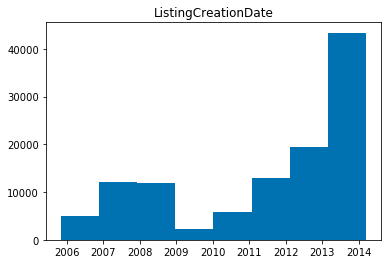



Variable:  ClosedDate
Years in Series:  8
Number of records:  55076  -  48.71 % of full dataset
Missing records for this variable:  57990
Min value: 2005-11-25 00:00:00  // Max value:  2014-03-10 00:00:00


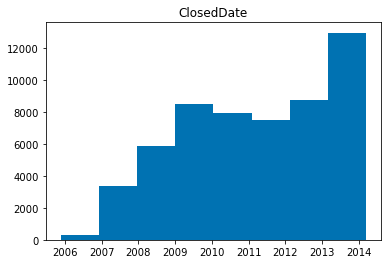



Variable:  DateCreditPulled
Years in Series:  8
Number of records:  113066  -  100.0 % of full dataset
Missing records for this variable:  0
Min value: 2005-11-09 00:30:04.487000  // Max value:  2014-03-10 12:20:56


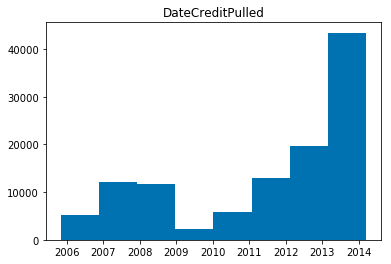



Variable:  FirstRecordedCreditLine
Years in Series:  65
Number of records:  112369  -  99.38 % of full dataset
Missing records for this variable:  697
Min value: 1947-08-24 00:00:00  // Max value:  2012-12-22 00:00:00


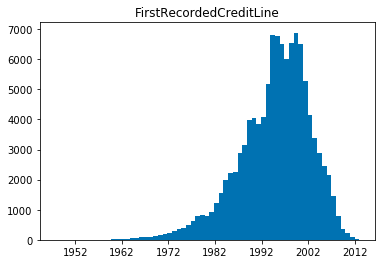



Variable:  LoanOriginationDate
Years in Series:  8
Number of records:  113066  -  100.0 % of full dataset
Missing records for this variable:  0
Min value: 2005-11-15 00:00:00  // Max value:  2014-03-12 00:00:00


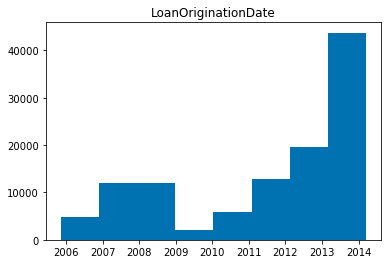

In [34]:
# Here we select our datetime columns, and loop over them with a try/except block
# Each variable should be plotted with our datetime histogram function. Errors will be noted.
datetimes = ['datetime64']
datetime_df = df_clean.select_dtypes(include=datetimes)
cols = [x for x in datetime_df.columns.tolist()]
print(len(cols)," Variables")
print(cols)
for col in cols:
    try:
        plot_date_histogram(df_clean,col)
    except:
        print("\nError on: ",col,"\n")

##### Datetime Observations

    - 'ListingCreationDate' - Rapid growth in Prosper listings in from 2013 on (doubled volume). Major falloff in listings following the financial crisis (somewhat expected), but recovery within 2 years. 
    - 'ClosedDate' - Only slightly negative closure rate during the financial crisis. However, charged off loans count as closed and are included in those totals
    - 'FirstRecordedCreditLine' - An overwhelming majority of borrowers look to have had their first credit lines started in the 1990s, with a long left tail of some elderly borrowers.
    - 'LoanOriginationDate' - same distribution as 'ListingCreationDate'

11  Variables
['LoanStatus', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 'IncomeVerifiable', 'IsInGoodStanding', 'HasSocialInvestment']
Variable:  LoanStatus
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset


C:\Users\Schonig LLC\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


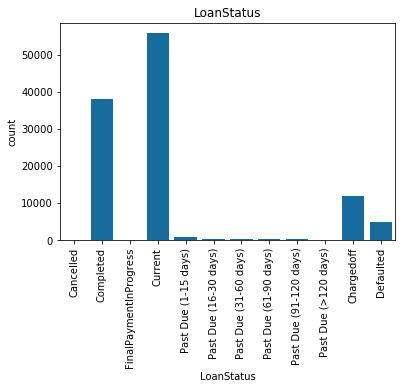



Variable:  ListingCategory (numeric)
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset


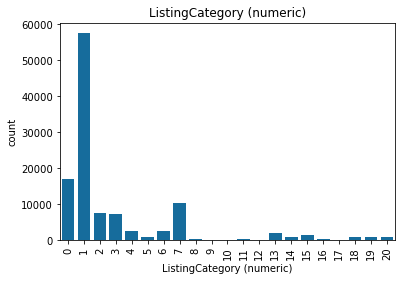



Variable:  BorrowerState
Number of records:  113066
Missing records for this variable:  5515  -  95.12 % of full dataset


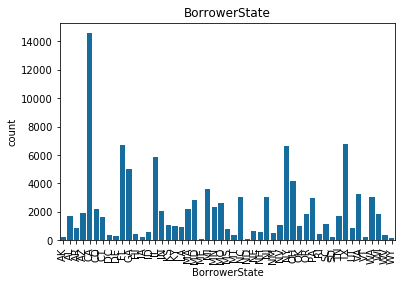



Variable:  Occupation
Number of records:  113066
Missing records for this variable:  3529  -  96.88 % of full dataset


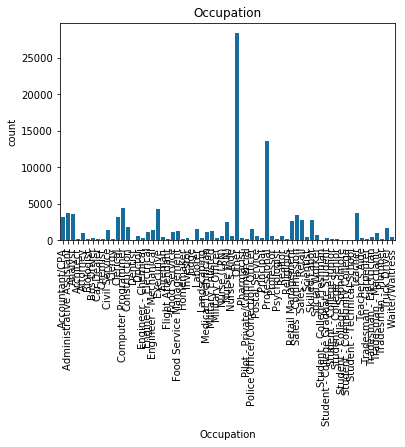



Variable:  EmploymentStatus
Number of records:  113066
Missing records for this variable:  2255  -  98.00999999999999 % of full dataset


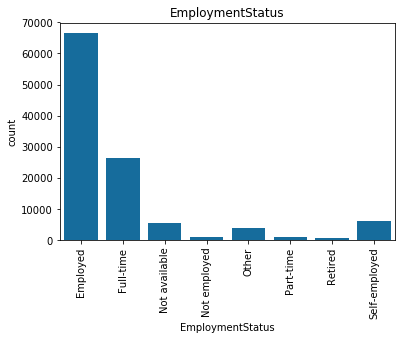



Variable:  IsBorrowerHomeowner
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset


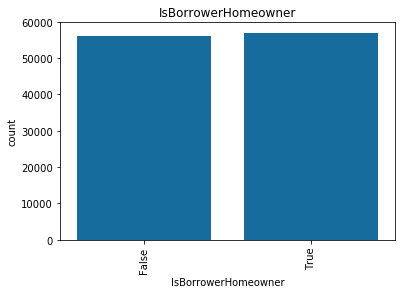



Variable:  CurrentlyInGroup
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset


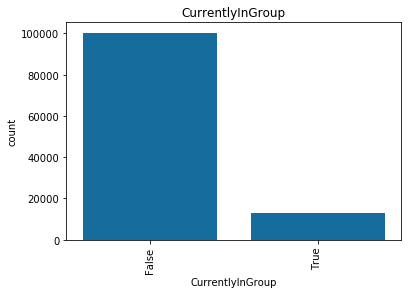



Variable:  IncomeRange
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset


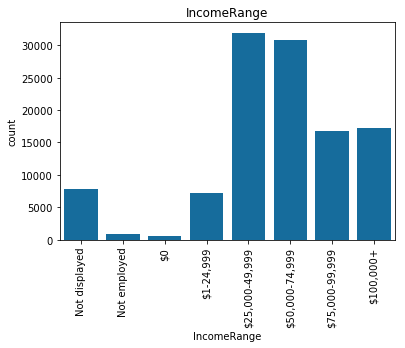



Variable:  IncomeVerifiable
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset


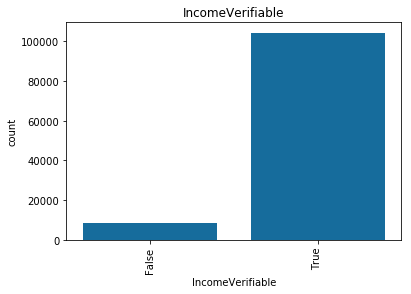



Variable:  IsInGoodStanding
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset


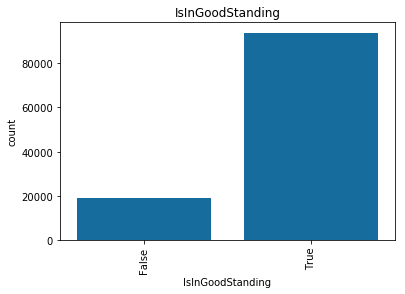



Variable:  HasSocialInvestment
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset


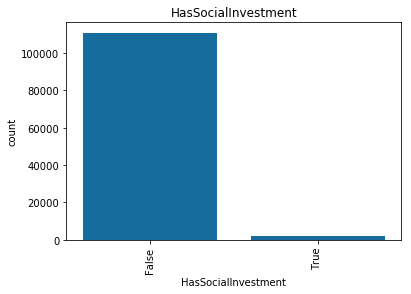

In [35]:
# Here we select our categorical and boolean columns, and loop over them with a try/except block
# Each variable should be plotted with our categorical countplot function. Errors will be noted.
cats_and_bools = ['category','bool']
cat_df = df_clean.select_dtypes(include=cats_and_bools)
cols = [x for x in cat_df.columns.tolist()]
print(len(cols)," Variables")
print(cols)
for col in cols:
    try:
        plot_cat_countplot(df_clean,col)
    except:
        print("\nError on: ",col,"\n")

#### Categorical & Boolean Observations

    - 'LoanStatus' - Strong majority of open loans are being paid on time. Of the closed loans, most were completed to terms, but a sizeable minority have been charged off or defaulted (~25%)
    - 'ListingCategory' - Unintelligible with numbers instead of labels. 20 variables does not lend to legible histograms.
    - 'BorrowerState' - Labels are difficult to read because of 51 category values. However, the plot does make it obvious that CA is over-represented among borrowers (double the next highest counts)
    - 'Occupation' - Unintelligible, but the plot makes it clear that the field is uninformative regardless. The overwhelming majority list "Other".
    - 'EmploymentStatus' - Most borrowers are employeed, but only a smaller subset have specified that they're employed fulltime 
    - 'IsBorrowerHomeowner' - Surprisingly, this is about evenly split
    - 'CurrentlyInGroup' - The overwhelming majority of loans are not included in a group
    - 'IncomeRange' - Most borrowers are middle-income, $25-75k per year. This plot maintained the order passed to it in cleaning.
    - 'IncomeVerifiable' - Majority of borrowers were able to verify their income... good!
    - 'InGoodStanding' - The majority of loans are in good standing. Only ~20% are past due, charged off or defaulted

61  Variables
['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfLis

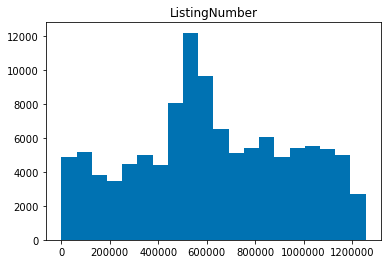



Variable:  Term
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 12  // Max value:  60
Mean value:  40.800169812322004  // StdDv value:  10.421517696751055
Bin edges at:  [12.  14.4 16.8 19.2 21.6 24.  26.4 28.8 31.2 33.6 36.  38.4 40.8 43.2
 45.6 48.  50.4 52.8 55.2 57.6 60. ]


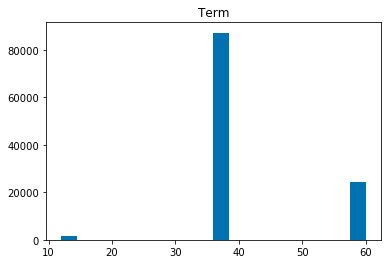



Variable:  BorrowerAPR
Number of records:  113041
Missing records for this variable:  25  -  99.98 % of full dataset
Min value: 0.006529999999999999  // Max value:  0.5122899999999999
Mean value:  0.2189803535884839  // StdDv value:  0.08048277631151358
Bin edges at:  [0.00653  0.031818 0.057106 0.082394 0.107682 0.13297  0.158258 0.183546
 0.208834 0.234122 0.25941  0.284698 0.309986 0.335274 0.360562 0.38585
 0.411138 0.436426 0.461714 0.487002 0.51229 ]


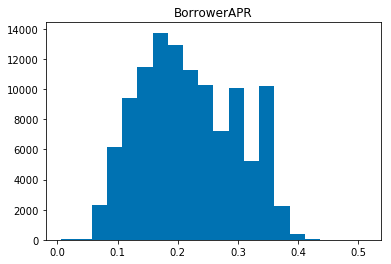



Variable:  BorrowerRate
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0.0  // Max value:  0.4975
Mean value:  0.19294574275200593  // StdDv value:  0.0749166031351895
Bin edges at:  [0.       0.024875 0.04975  0.074625 0.0995   0.124375 0.14925  0.174125
 0.199    0.223875 0.24875  0.273625 0.2985   0.323375 0.34825  0.373125
 0.398    0.422875 0.44775  0.472625 0.4975  ]


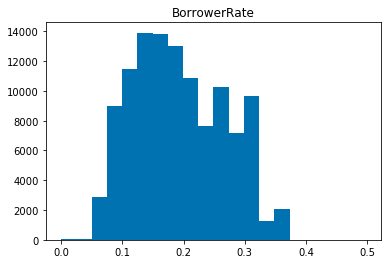



Variable:  LenderYield
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: -0.01  // Max value:  0.4925
Mean value:  0.1828821608617939  // StdDv value:  0.07461219433585249
Bin edges at:  [-0.01      0.015125  0.04025   0.065375  0.0905    0.115625  0.14075
  0.165875  0.191     0.216125  0.24125   0.266375  0.2915    0.316625
  0.34175   0.366875  0.392     0.417125  0.44225   0.467375  0.4925
  0.517625]


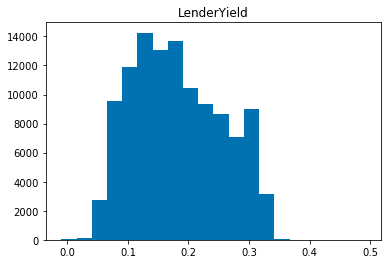



Variable:  EstimatedEffectiveYield
Number of records:  83982
Missing records for this variable:  29084  -  74.28 % of full dataset
Min value: -0.1827  // Max value:  0.3199
Mean value:  0.1688701301469355  // StdDv value:  0.06860736221103478
Bin edges at:  [-0.1827  -0.15757 -0.13244 -0.10731 -0.08218 -0.05705 -0.03192 -0.00679
  0.01834  0.04347  0.0686   0.09373  0.11886  0.14399  0.16912  0.19425
  0.21938  0.24451  0.26964  0.29477  0.3199 ]


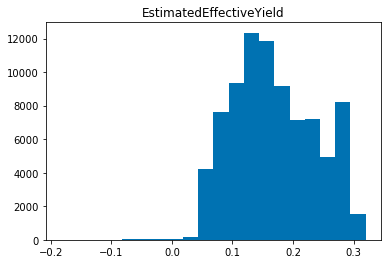



Variable:  EstimatedLoss
Number of records:  83982
Missing records for this variable:  29084  -  74.28 % of full dataset
Min value: 0.0049  // Max value:  0.366
Mean value:  0.08041690481294028  // StdDv value:  0.04685100038047405
Bin edges at:  [0.0049   0.022955 0.04101  0.059065 0.07712  0.095175 0.11323  0.131285
 0.14934  0.167395 0.18545  0.203505 0.22156  0.239615 0.25767  0.275725
 0.29378  0.311835 0.32989  0.347945 0.366   ]


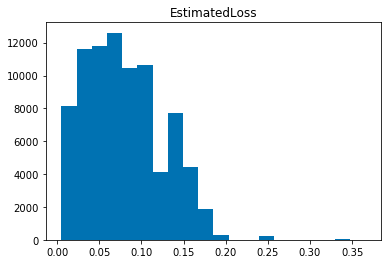



Variable:  EstimatedReturn
Number of records:  83982
Missing records for this variable:  29084  -  74.28 % of full dataset
Min value: -0.1827  // Max value:  0.2837
Mean value:  0.09624589519182612  // StdDv value:  0.030474717226637946
Bin edges at:  [-0.1827  -0.15938 -0.13606 -0.11274 -0.08942 -0.0661  -0.04278 -0.01946
  0.00386  0.02718  0.0505   0.07382  0.09714  0.12046  0.14378  0.1671
  0.19042  0.21374  0.23706  0.26038  0.2837 ]


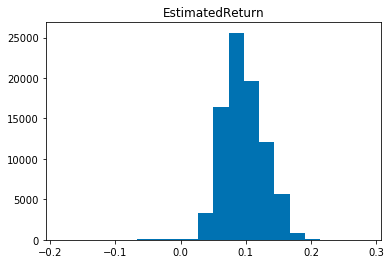



Variable:  ProsperRating (numeric)
Number of records:  83982
Missing records for this variable:  29084  -  74.28 % of full dataset
Min value: 1.0  // Max value:  7.0
Mean value:  4.068705198733062  // StdDv value:  1.6754420383957225
Bin edges at:  [1.  1.3 1.6 1.9 2.2 2.5 2.8 3.1 3.4 3.7 4.  4.3 4.6 4.9 5.2 5.5 5.8 6.1
 6.4 6.7 7. ]


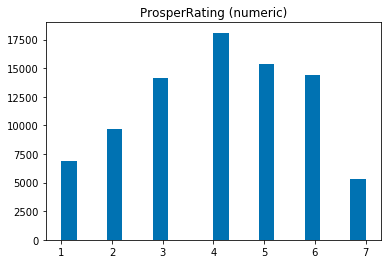



Variable:  ProsperScore
Number of records:  83982
Missing records for this variable:  29084  -  74.28 % of full dataset
Min value: 1.0  // Max value:  11.0
Mean value:  5.952870853278084  // StdDv value:  2.3738970752257567
Bin edges at:  [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11. ]


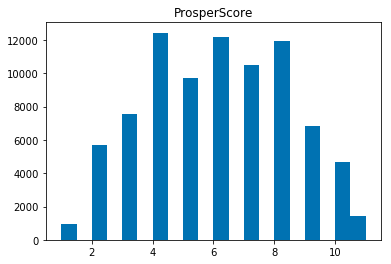



Variable:  EmploymentStatusDuration
Number of records:  105441
Missing records for this variable:  7625  -  93.26 % of full dataset
Min value: 0.0  // Max value:  755.0
Mean value:  96.06058364393357  // StdDv value:  94.43224105424899
Bin edges at:  [  0.    37.75  75.5  113.25 151.   188.75 226.5  264.25 302.   339.75
 377.5  415.25 453.   490.75 528.5  566.25 604.   641.75 679.5  717.25
 755.  ]


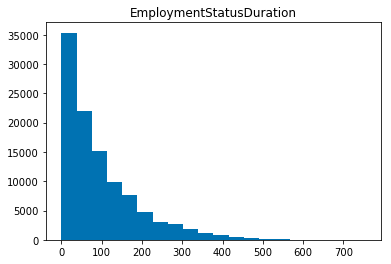



Variable:  CreditScoreRangeLower
Number of records:  112475
Missing records for this variable:  591  -  99.48 % of full dataset
Min value: 0.0  // Max value:  880.0
Mean value:  685.5249611024672  // StdDv value:  66.63589473654848
Bin edges at:  [  0.  44.  88. 132. 176. 220. 264. 308. 352. 396. 440. 484. 528. 572.
 616. 660. 704. 748. 792. 836. 880.]


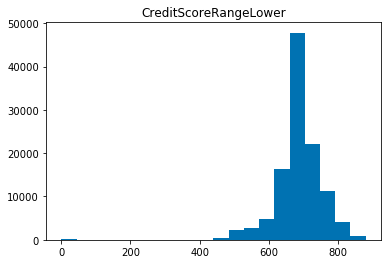



Variable:  CreditScoreRangeUpper
Number of records:  112475
Missing records for this variable:  591  -  99.48 % of full dataset
Min value: 19.0  // Max value:  899.0
Mean value:  704.5249611024672  // StdDv value:  66.63589473654848
Bin edges at:  [ 19.  63. 107. 151. 195. 239. 283. 327. 371. 415. 459. 503. 547. 591.
 635. 679. 723. 767. 811. 855. 899.]


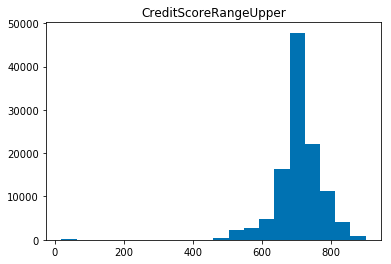



Variable:  CurrentCreditLines
Number of records:  105462
Missing records for this variable:  7604  -  93.27 % of full dataset
Min value: 0.0  // Max value:  59.0
Mean value:  10.307058466556674  // StdDv value:  5.4581956376266
Bin edges at:  [ 0.    2.95  5.9   8.85 11.8  14.75 17.7  20.65 23.6  26.55 29.5  32.45
 35.4  38.35 41.3  44.25 47.2  50.15 53.1  56.05 59.  ]


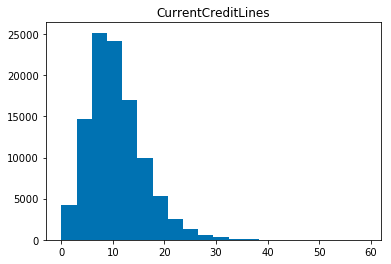



Variable:  OpenCreditLines
Number of records:  105462
Missing records for this variable:  7604  -  93.27 % of full dataset
Min value: 0.0  // Max value:  54.0
Mean value:  9.248335893497185  // StdDv value:  5.021249054106952
Bin edges at:  [ 0.   2.7  5.4  8.1 10.8 13.5 16.2 18.9 21.6 24.3 27.  29.7 32.4 35.1
 37.8 40.5 43.2 45.9 48.6 51.3 54. ]


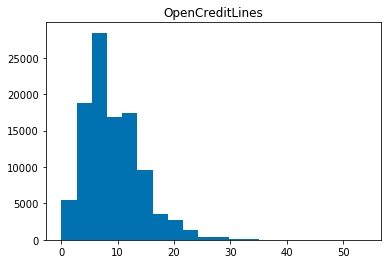



Variable:  TotalCreditLinespast7years
Number of records:  112369
Missing records for this variable:  697  -  99.38 % of full dataset
Min value: 2.0  // Max value:  136.0
Mean value:  26.746380229422705  // StdDv value:  13.643731348744073
Bin edges at:  [  2.    8.7  15.4  22.1  28.8  35.5  42.2  48.9  55.6  62.3  69.   75.7
  82.4  89.1  95.8 102.5 109.2 115.9 122.6 129.3 136. ]


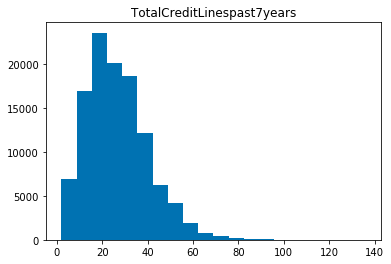



Variable:  OpenRevolvingAccounts
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0  // Max value:  51
Mean value:  6.959466152512691  // StdDv value:  4.629302834101281
Bin edges at:  [ 0.    2.55  5.1   7.65 10.2  12.75 15.3  17.85 20.4  22.95 25.5  28.05
 30.6  33.15 35.7  38.25 40.8  43.35 45.9  48.45 51.  ]


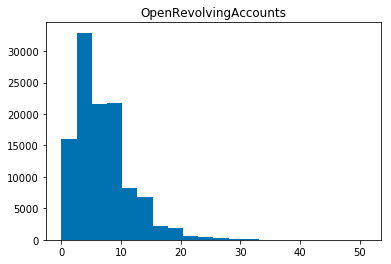



Variable:  OpenRevolvingMonthlyPayment
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0.0  // Max value:  14985.0
Mean value:  397.82099835494313  // StdDv value:  447.657265996921
Bin edges at:  [    0.     749.25  1498.5   2247.75  2997.    3746.25  4495.5   5244.75
  5994.    6743.25  7492.5   8241.75  8991.    9740.25 10489.5  11238.75
 11988.   12737.25 13486.5  14235.75 14985.  ]


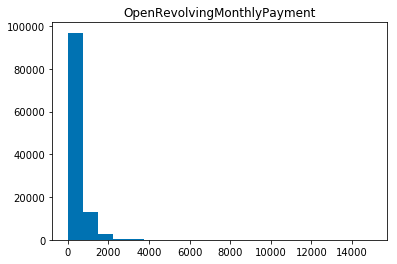



Variable:  InquiriesLast6Months
Number of records:  112369
Missing records for this variable:  697  -  99.38 % of full dataset
Min value: 0.0  // Max value:  105.0
Mean value:  1.4385996137724817  // StdDv value:  2.444093346493232
Bin edges at:  [  0.     5.25  10.5   15.75  21.    26.25  31.5   36.75  42.    47.25
  52.5   57.75  63.    68.25  73.5   78.75  84.    89.25  94.5   99.75
 105.  ]


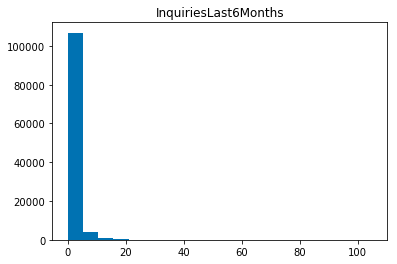



Variable:  TotalInquiries
Number of records:  111907
Missing records for this variable:  1159  -  98.97 % of full dataset
Min value: 0.0  // Max value:  379.0
Mean value:  5.590812013546963  // StdDv value:  6.446341759636431
Bin edges at:  [  0.    18.95  37.9   56.85  75.8   94.75 113.7  132.65 151.6  170.55
 189.5  208.45 227.4  246.35 265.3  284.25 303.2  322.15 341.1  360.05
 379.  ]


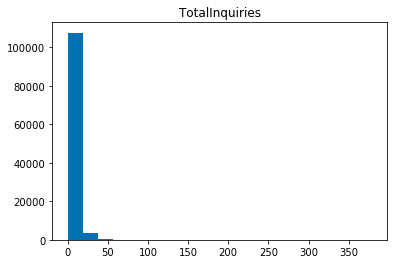



Variable:  CurrentDelinquencies
Number of records:  112369
Missing records for this variable:  697  -  99.38 % of full dataset
Min value: 0.0  // Max value:  83.0
Mean value:  0.5951285496889711  // StdDv value:  1.9842335917969822
Bin edges at:  [ 0.    4.15  8.3  12.45 16.6  20.75 24.9  29.05 33.2  37.35 41.5  45.65
 49.8  53.95 58.1  62.25 66.4  70.55 74.7  78.85 83.  ]


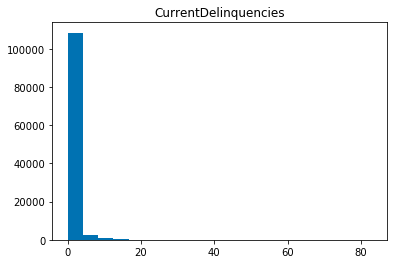



Variable:  AmountDelinquent
Number of records:  105444
Missing records for this variable:  7622  -  93.26 % of full dataset
Min value: 0.0  // Max value:  463881.0
Mean value:  986.8184344296499  // StdDv value:  7156.683653493164
Bin edges at:  [     0.    23194.05  46388.1   69582.15  92776.2  115970.25 139164.3
 162358.35 185552.4  208746.45 231940.5  255134.55 278328.6  301522.65
 324716.7  347910.75 371104.8  394298.85 417492.9  440686.95 463881.  ]


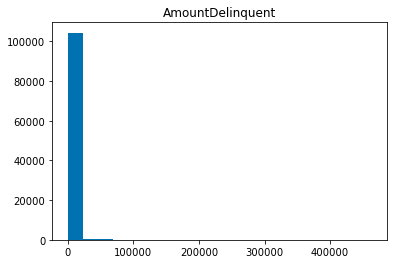



Variable:  DelinquenciesLast7Years
Number of records:  112076
Missing records for this variable:  990  -  99.11999999999999 % of full dataset
Min value: 0.0  // Max value:  99.0
Mean value:  4.15889218030622  // StdDv value:  10.163464524260535
Bin edges at:  [ 0.    4.95  9.9  14.85 19.8  24.75 29.7  34.65 39.6  44.55 49.5  54.45
 59.4  64.35 69.3  74.25 79.2  84.15 89.1  94.05 99.  ]


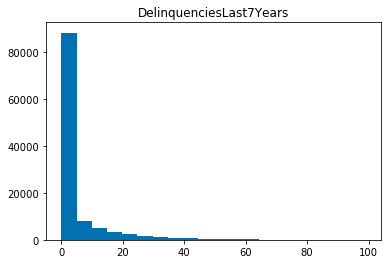



Variable:  PublicRecordsLast10Years
Number of records:  112369
Missing records for this variable:  697  -  99.38 % of full dataset
Min value: 0.0  // Max value:  38.0
Mean value:  0.31276419653107174  // StdDv value:  0.7287920752963714
Bin edges at:  [ 0.   1.9  3.8  5.7  7.6  9.5 11.4 13.3 15.2 17.1 19.  20.9 22.8 24.7
 26.6 28.5 30.4 32.3 34.2 36.1 38. ]


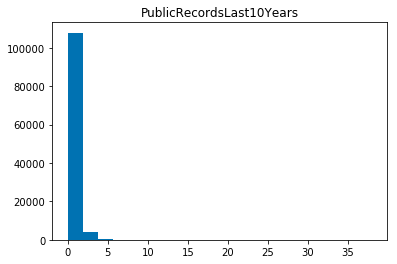



Variable:  PublicRecordsLast12Months
Number of records:  105462
Missing records for this variable:  7604  -  93.27 % of full dataset
Min value: 0.0  // Max value:  20.0
Mean value:  0.015209269689556429  // StdDv value:  0.1546908726877351
Bin edges at:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


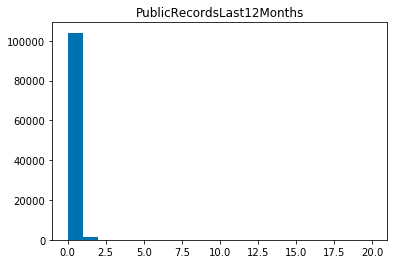



Variable:  RevolvingCreditBalance
Number of records:  105462
Missing records for this variable:  7604  -  93.27 % of full dataset
Min value: 0.0  // Max value:  1435667.0
Mean value:  17592.29599286947  // StdDv value:  32945.895269896086
Bin edges at:  [      0.     71783.35  143566.7   215350.05  287133.4   358916.75
  430700.1   502483.45  574266.8   646050.15  717833.5   789616.85
  861400.2   933183.55 1004966.9  1076750.25 1148533.6  1220316.95
 1292100.3  1363883.65 1435667.  ]


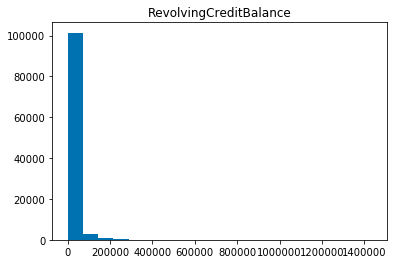



Variable:  BankcardUtilization
Number of records:  105462
Missing records for this variable:  7604  -  93.27 % of full dataset
Min value: 0.0  // Max value:  5.95
Mean value:  0.5610878799947009  // StdDv value:  0.3181893117470881
Bin edges at:  [0.     0.2975 0.595  0.8925 1.19   1.4875 1.785  2.0825 2.38   2.6775
 2.975  3.2725 3.57   3.8675 4.165  4.4625 4.76   5.0575 5.355  5.6525
 5.95   6.2475]


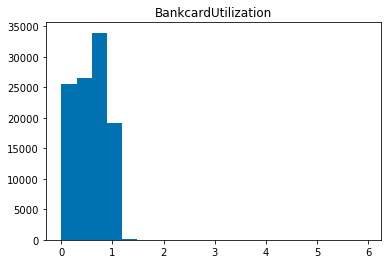



Variable:  AvailableBankcardCredit
Number of records:  105522
Missing records for this variable:  7544  -  93.33 % of full dataset
Min value: 0.0  // Max value:  646285.0
Mean value:  11208.182028392184  // StdDv value:  19847.681185169335
Bin edges at:  [     0.    32314.25  64628.5   96942.75 129257.   161571.25 193885.5
 226199.75 258514.   290828.25 323142.5  355456.75 387771.   420085.25
 452399.5  484713.75 517028.   549342.25 581656.5  613970.75 646285.  ]


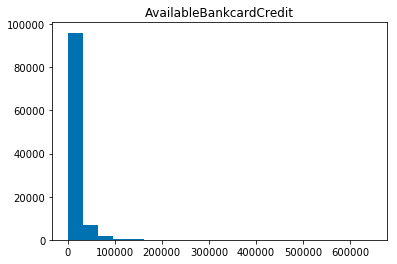



Variable:  TotalTrades
Number of records:  105522
Missing records for this variable:  7544  -  93.33 % of full dataset
Min value: 0.0  // Max value:  126.0
Mean value:  23.221517787759897  // StdDv value:  11.875302956468643
Bin edges at:  [  0.    6.3  12.6  18.9  25.2  31.5  37.8  44.1  50.4  56.7  63.   69.3
  75.6  81.9  88.2  94.5 100.8 107.1 113.4 119.7 126.  132.3]


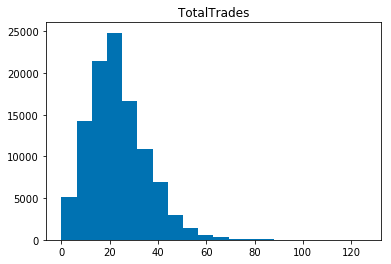



Variable:  TradesNeverDelinquent (percentage)
Number of records:  105522
Missing records for this variable:  7544  -  93.33 % of full dataset
Min value: 0.0  // Max value:  1.0
Mean value:  0.8855521123557549  // StdDv value:  0.14842820194143438
Bin edges at:  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


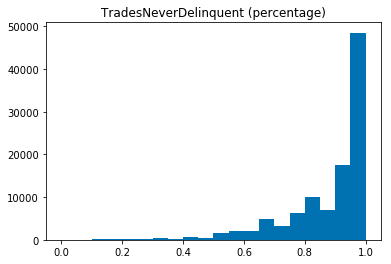



Variable:  TradesOpenedLast6Months
Number of records:  105522
Missing records for this variable:  7544  -  93.33 % of full dataset
Min value: 0.0  // Max value:  20.0
Mean value:  0.8020886639752848  // StdDv value:  1.0979753150864773
Bin edges at:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


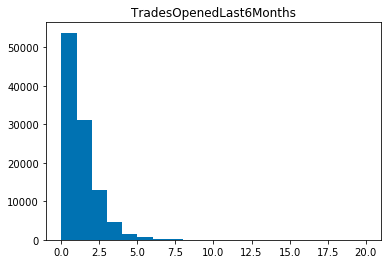



Variable:  DebtToIncomeRatio
Number of records:  104594
Missing records for this variable:  8472  -  92.51 % of full dataset
Min value: 0.0  // Max value:  10.01
Mean value:  0.2760324776755856  // StdDv value:  0.5537376037775095
Bin edges at:  [ 0.      0.5005  1.001   1.5015  2.002   2.5025  3.003   3.5035  4.004
  4.5045  5.005   5.5055  6.006   6.5065  7.007   7.5075  8.008   8.5085
  9.009   9.5095 10.01   10.5105]


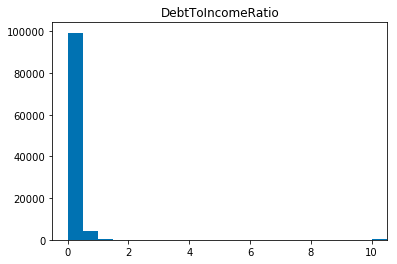



Variable:  StatedMonthlyIncome
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0.0  // Max value:  1750002.916667
Mean value:  5605.119579863301  // StdDv value:  7495.595562667693
Bin edges at:  [      0.           87500.14583335  175000.2916667   262500.43750005
  350000.5833334   437500.72916675  525000.8750001   612501.02083345
  700001.1666668   787501.31250015  875001.4583335   962501.60416685
 1050001.7500002  1137501.89583355 1225002.0416669  1312502.18750025
 1400002.3333336  1487502.47916695 1575002.6250003  1662502.77083365
 1750002.916667  ]


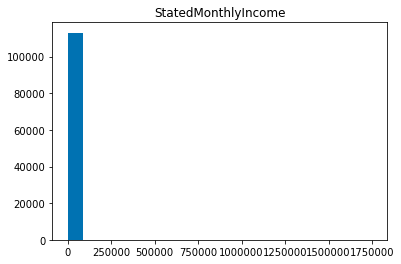



Variable:  TotalProsperLoans
Number of records:  21923
Missing records for this variable:  91143  -  19.39 % of full dataset
Min value: 0.0  // Max value:  8.0
Mean value:  1.420471650777722  // StdDv value:  0.7637106225081488
Bin edges at:  [0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4.  4.4 4.8 5.2 5.6 6.  6.4 6.8
 7.2 7.6 8. ]


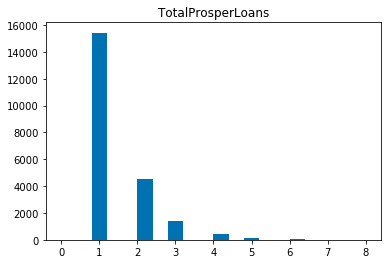



Variable:  TotalProsperPaymentsBilled
Number of records:  21923
Missing records for this variable:  91143  -  19.39 % of full dataset
Min value: 0.0  // Max value:  141.0
Mean value:  22.932262920220772  // StdDv value:  19.248707636190986
Bin edges at:  [  0.     7.05  14.1   21.15  28.2   35.25  42.3   49.35  56.4   63.45
  70.5   77.55  84.6   91.65  98.7  105.75 112.8  119.85 126.9  133.95
 141.   148.05]


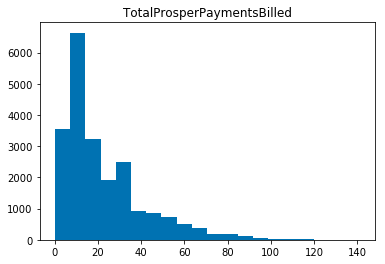



Variable:  OnTimeProsperPayments
Number of records:  21923
Missing records for this variable:  91143  -  19.39 % of full dataset
Min value: 0.0  // Max value:  141.0
Mean value:  22.269032522921133  // StdDv value:  18.82859466148134
Bin edges at:  [  0.     7.05  14.1   21.15  28.2   35.25  42.3   49.35  56.4   63.45
  70.5   77.55  84.6   91.65  98.7  105.75 112.8  119.85 126.9  133.95
 141.   148.05]


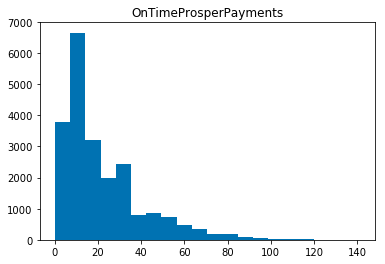



Variable:  ProsperPaymentsLessThanOneMonthLate
Number of records:  21923
Missing records for this variable:  91143  -  19.39 % of full dataset
Min value: 0.0  // Max value:  42.0
Mean value:  0.614514436892761  // StdDv value:  2.4465759817720887
Bin edges at:  [ 0.   2.1  4.2  6.3  8.4 10.5 12.6 14.7 16.8 18.9 21.  23.1 25.2 27.3
 29.4 31.5 33.6 35.7 37.8 39.9 42. ]


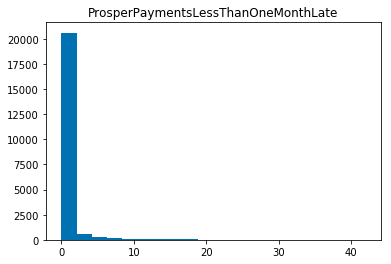



Variable:  ProsperPaymentsOneMonthPlusLate
Number of records:  21923
Missing records for this variable:  91143  -  19.39 % of full dataset
Min value: 0.0  // Max value:  21.0
Mean value:  0.048487889431190985  // StdDv value:  0.5571710878088133
Bin edges at:  [ 0.    1.05  2.1   3.15  4.2   5.25  6.3   7.35  8.4   9.45 10.5  11.55
 12.6  13.65 14.7  15.75 16.8  17.85 18.9  19.95 21.  ]


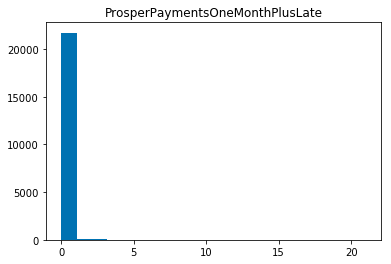



Variable:  ProsperPrincipalBorrowed
Number of records:  21923
Missing records for this variable:  91143  -  19.39 % of full dataset
Min value: 0.0  // Max value:  72499.0
Mean value:  8452.830630844319  // StdDv value:  7389.362098513555
Bin edges at:  [    0.    3624.95  7249.9  10874.85 14499.8  18124.75 21749.7  25374.65
 28999.6  32624.55 36249.5  39874.45 43499.4  47124.35 50749.3  54374.25
 57999.2  61624.15 65249.1  68874.05 72499.  ]


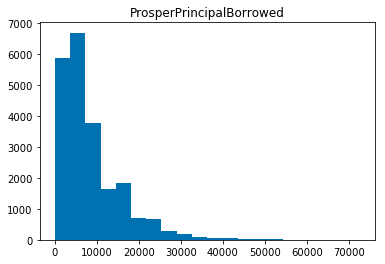



Variable:  ProsperPrincipalOutstanding
Number of records:  21923
Missing records for this variable:  91143  -  19.39 % of full dataset
Min value: 0.0  // Max value:  23450.95
Mean value:  2929.1901674040923  // StdDv value:  3804.772154369466
Bin edges at:  [    0.      1172.5475  2345.095   3517.6425  4690.19    5862.7375
  7035.285   8207.8325  9380.38   10552.9275 11725.475  12898.0225
 14070.57   15243.1175 16415.665  17588.2125 18760.76   19933.3075
 21105.855  22278.4025 23450.95  ]


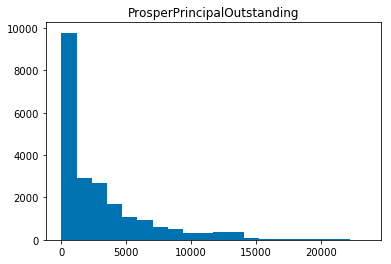



Variable:  ScorexChangeAtTimeOfListing
Number of records:  18912
Missing records for this variable:  94154  -  16.73 % of full dataset
Min value: -209.0  // Max value:  286.0
Mean value:  -3.2295368020304567  // StdDv value:  50.06302335536018
Bin edges at:  [-209.   -184.25 -159.5  -134.75 -110.    -85.25  -60.5   -35.75  -11.
   13.75   38.5    63.25   88.    112.75  137.5   162.25  187.    211.75
  236.5   261.25  286.  ]


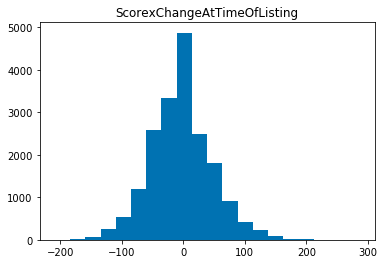



Variable:  LoanCurrentDaysDelinquent
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0  // Max value:  2704
Mean value:  153.99140325119842  // StdDv value:  467.91993115309765
Bin edges at:  [   0.   135.2  270.4  405.6  540.8  676.   811.2  946.4 1081.6 1216.8
 1352.  1487.2 1622.4 1757.6 1892.8 2028.  2163.2 2298.4 2433.6 2568.8
 2704. ]


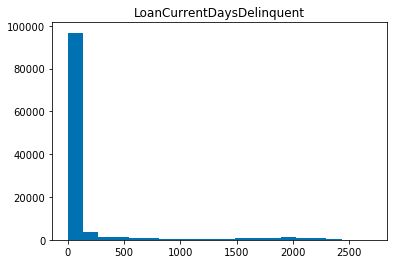



Variable:  LoanFirstDefaultedCycleNumber
Number of records:  16952
Missing records for this variable:  96114  -  14.99 % of full dataset
Min value: 0.0  // Max value:  44.0
Mean value:  16.268463898065125  // StdDv value:  9.005898147949226
Bin edges at:  [ 0.   2.2  4.4  6.6  8.8 11.  13.2 15.4 17.6 19.8 22.  24.2 26.4 28.6
 30.8 33.  35.2 37.4 39.6 41.8 44. ]


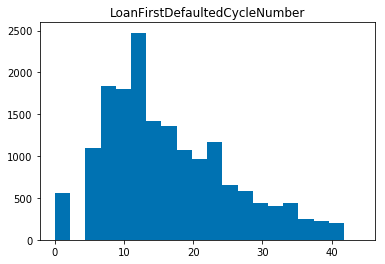



Variable:  LoanMonthsSinceOrigination
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0  // Max value:  100
Mean value:  32.121769585905575  // StdDv value:  29.978914961902017
Bin edges at:  [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]


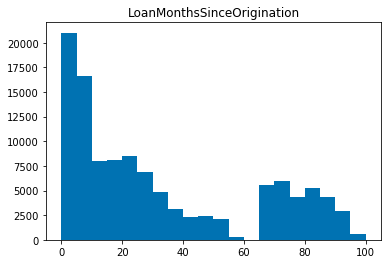



Variable:  LoanNumber
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 1  // Max value:  136486
Mean value:  69044.52799249995  // StdDv value:  38800.158866564176
Bin edges at:  [1.0000000e+00 6.8252500e+03 1.3649500e+04 2.0473750e+04 2.7298000e+04
 3.4122250e+04 4.0946500e+04 4.7770750e+04 5.4595000e+04 6.1419250e+04
 6.8243500e+04 7.5067750e+04 8.1892000e+04 8.8716250e+04 9.5540500e+04
 1.0236475e+05 1.0918900e+05 1.1601325e+05 1.2283750e+05 1.2966175e+05
 1.3648600e+05]


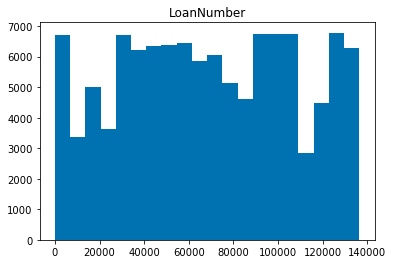



Variable:  LoanOriginalAmount
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 1000  // Max value:  35000
Mean value:  8314.76230697115  // StdDv value:  6237.007841003334
Bin edges at:  [ 1000.  2700.  4400.  6100.  7800.  9500. 11200. 12900. 14600. 16300.
 18000. 19700. 21400. 23100. 24800. 26500. 28200. 29900. 31600. 33300.
 35000.]


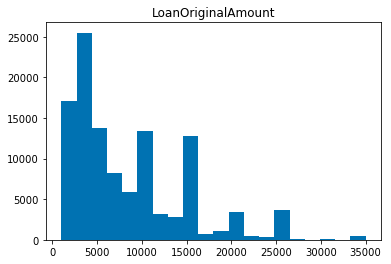



Variable:  MonthlyLoanPayment
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0.0  // Max value:  2251.51
Mean value:  271.93274220369113  // StdDv value:  192.5499790552399
Bin edges at:  [   0.      112.5755  225.151   337.7265  450.302   562.8775  675.453
  788.0285  900.604  1013.1795 1125.755  1238.3305 1350.906  1463.4815
 1576.057  1688.6325 1801.208  1913.7835 2026.359  2138.9345 2251.51  ]


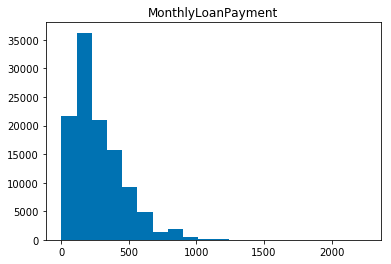



Variable:  LP_CustomerPayments
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: -2.3499  // Max value:  40702.39
Mean value:  4209.236052404846  // StdDv value:  4798.081993955193
Bin edges at:  [-2.34990000e+00  2.03288710e+03  4.06812409e+03  6.10336108e+03
  8.13859808e+03  1.01738351e+04  1.22090721e+04  1.42443091e+04
  1.62795461e+04  1.83147831e+04  2.03500200e+04  2.23852570e+04
  2.44204940e+04  2.64557310e+04  2.84909680e+04  3.05262050e+04
  3.25614420e+04  3.45966790e+04  3.66319160e+04  3.86671530e+04
  4.07023900e+04]


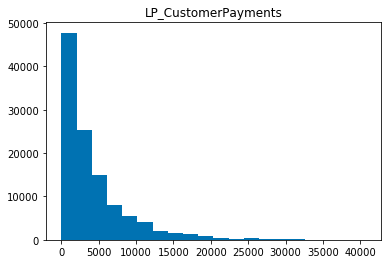



Variable:  LP_CustomerPrincipalPayments
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0.0  // Max value:  35000.0
Mean value:  3125.487227392059  // StdDv value:  4076.877458924407
Bin edges at:  [    0.  1750.  3500.  5250.  7000.  8750. 10500. 12250. 14000. 15750.
 17500. 19250. 21000. 22750. 24500. 26250. 28000. 29750. 31500. 33250.
 35000.]


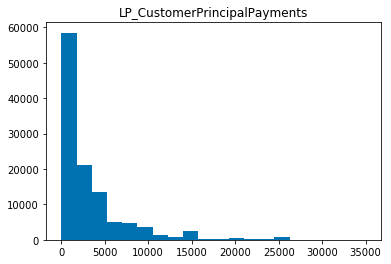



Variable:  LP_InterestandFees
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: -2.3499  // Max value:  15617.03
Mean value:  1083.7488250128188  // StdDv value:  1185.5330243385945
Bin edges at:  [-2.34990000e+00  7.78619095e+02  1.55958809e+03  2.34055708e+03
  3.12152608e+03  3.90249507e+03  4.68346407e+03  5.46443306e+03
  6.24540206e+03  7.02637105e+03  7.80734005e+03  8.58830904e+03
  9.36927804e+03  1.01502470e+04  1.09312160e+04  1.17121850e+04
  1.24931540e+04  1.32741230e+04  1.40550920e+04  1.48360610e+04
  1.56170300e+04  1.63979990e+04]


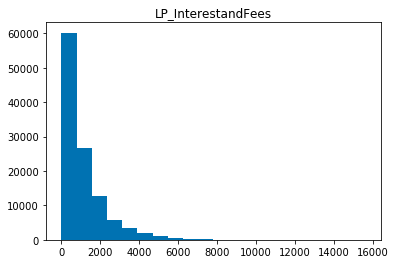



Variable:  LP_ServiceFees
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: -664.87  // Max value:  32.06
Mean value:  -55.01963870659922  // StdDv value:  60.79409187215478
Bin edges at:  [-664.87   -630.0235 -595.177  -560.3305 -525.484  -490.6375 -455.791
 -420.9445 -386.098  -351.2515 -316.405  -281.5585 -246.712  -211.8655
 -177.019  -142.1725 -107.326   -72.4795  -37.633    -2.7865   32.06  ]


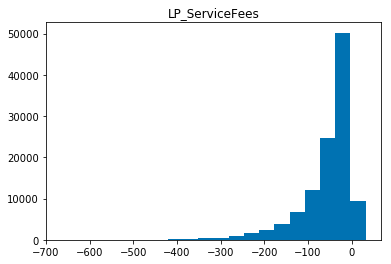



Variable:  LP_CollectionFees
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: -9274.75  // Max value:  0.0
Mean value:  -14.350990799179296  // StdDv value:  109.6452159327009
Bin edges at:  [-9.27475000e+03 -8.81101250e+03 -8.34727500e+03 -7.88353750e+03
 -7.41980000e+03 -6.95606250e+03 -6.49232500e+03 -6.02858750e+03
 -5.56485000e+03 -5.10111250e+03 -4.63737500e+03 -4.17363750e+03
 -3.70990000e+03 -3.24616250e+03 -2.78242500e+03 -2.31868750e+03
 -1.85495000e+03 -1.39121250e+03 -9.27475000e+02 -4.63737500e+02
 -1.45519152e-11]


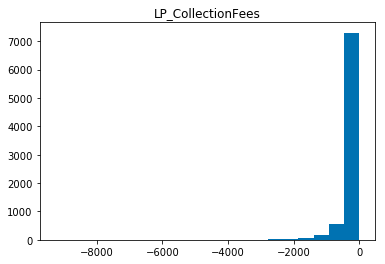



Variable:  LP_GrossPrincipalLoss
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: -94.2  // Max value:  25000.0
Mean value:  705.8422064988579  // StdDv value:  2396.901813809356
Bin edges at:  [  -94.2   1160.51  2415.22  3669.93  4924.64  6179.35  7434.06  8688.77
  9943.48 11198.19 12452.9  13707.61 14962.32 16217.03 17471.74 18726.45
 19981.16 21235.87 22490.58 23745.29 25000.  ]


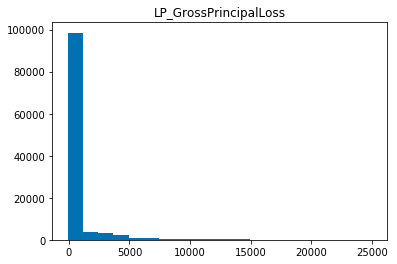



Variable:  LP_NetPrincipalLoss
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: -954.55  // Max value:  25000.0
Mean value:  686.6697980621936  // StdDv value:  2365.4671151815787
Bin edges at:  [ -954.55     343.1775  1640.905   2938.6325  4236.36    5534.0875
  6831.815   8129.5425  9427.27   10724.9975 12022.725  13320.4525
 14618.18   15915.9075 17213.635  18511.3625 19809.09   21106.8175
 22404.545  23702.2725 25000.    ]


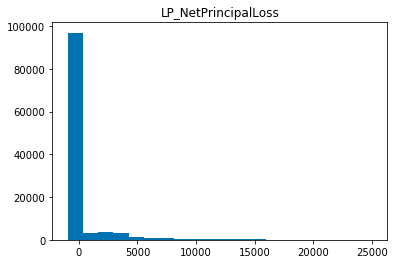



Variable:  LP_NonPrincipalRecoverypayments
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0.0  // Max value:  21117.9
Mean value:  25.33637229582723  // StdDv value:  276.7088032070248
Bin edges at:  [    0.     1055.895  2111.79   3167.685  4223.58   5279.475  6335.37
  7391.265  8447.16   9503.055 10558.95  11614.845 12670.74  13726.635
 14782.53  15838.425 16894.32  17950.215 19006.11  20062.005 21117.9
 22173.795]


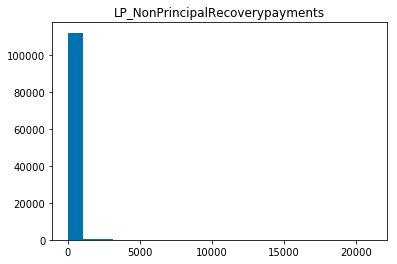



Variable:  PercentFunded
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0.7  // Max value:  1.0125
Mean value:  0.9985726115720018  // StdDv value:  0.01798727851192546
Bin edges at:  [0.7      0.715625 0.73125  0.746875 0.7625   0.778125 0.79375  0.809375
 0.825    0.840625 0.85625  0.871875 0.8875   0.903125 0.91875  0.934375
 0.95     0.965625 0.98125  0.996875 1.0125  ]


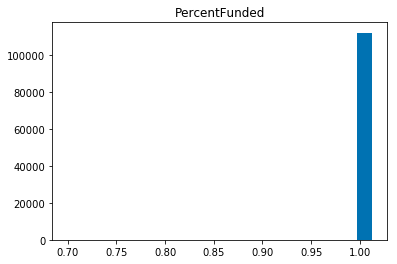



Variable:  Recommendations
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0  // Max value:  39
Mean value:  0.04837882298834309  // StdDv value:  0.3335798710100264
Bin edges at:  [ 0.    1.95  3.9   5.85  7.8   9.75 11.7  13.65 15.6  17.55 19.5  21.45
 23.4  25.35 27.3  29.25 31.2  33.15 35.1  37.05 39.   40.95]


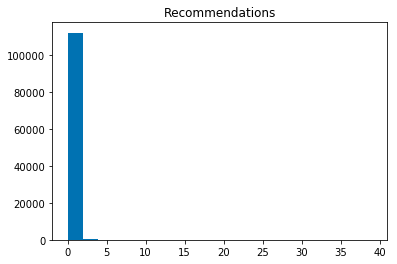



Variable:  InvestmentFromFriendsCount
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0  // Max value:  33
Mean value:  0.023641059204358515  // StdDv value:  0.23329630373470706
Bin edges at:  [ 0.    1.65  3.3   4.95  6.6   8.25  9.9  11.55 13.2  14.85 16.5  18.15
 19.8  21.45 23.1  24.75 26.4  28.05 29.7  31.35 33.  ]


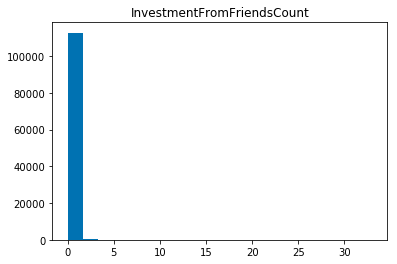



Variable:  InvestmentFromFriendsAmount
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0.0  // Max value:  25000.0
Mean value:  16.678248898873232  // StdDv value:  295.6741697240334
Bin edges at:  [    0.  1250.  2500.  3750.  5000.  6250.  7500.  8750. 10000. 11250.
 12500. 13750. 15000. 16250. 17500. 18750. 20000. 21250. 22500. 23750.
 25000.]


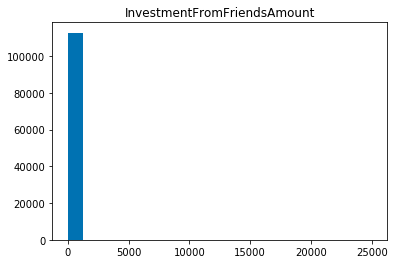



Variable:  Investors
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 1  // Max value:  1189
Mean value:  80.87614313763642  // StdDv value:  103.34027693895237
Bin edges at:  [1.0000e+00 6.0400e+01 1.1980e+02 1.7920e+02 2.3860e+02 2.9800e+02
 3.5740e+02 4.1680e+02 4.7620e+02 5.3560e+02 5.9500e+02 6.5440e+02
 7.1380e+02 7.7320e+02 8.3260e+02 8.9200e+02 9.5140e+02 1.0108e+03
 1.0702e+03 1.1296e+03 1.1890e+03 1.2484e+03]


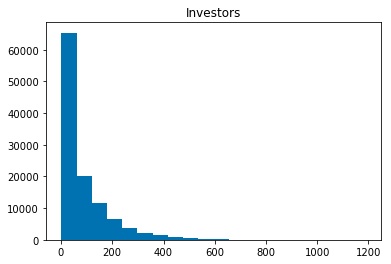



Variable:  ServiceFee
Number of records:  113066
Missing records for this variable:  0  -  100.0 % of full dataset
Min value: 0.0  // Max value:  0.05500000000000005
Mean value:  0.010063581890216666  // StdDv value:  0.0029923086526983337
Bin edges at:  [0.      0.00275 0.0055  0.00825 0.011   0.01375 0.0165  0.01925 0.022
 0.02475 0.0275  0.03025 0.033   0.03575 0.0385  0.04125 0.044   0.04675
 0.0495  0.05225 0.055  ]


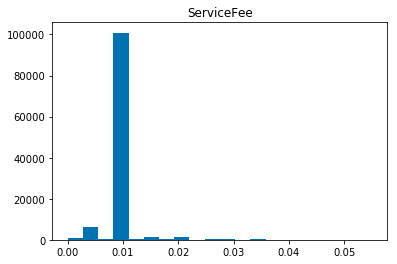

In [36]:
numerics = ['float64','int64']
numeric_df = df_clean.select_dtypes(include=numerics)
cols = [x for x in numeric_df.columns.tolist()]
#cols = ['Term','BorrowerAPR','InvestmentFromFriendsAmount','ServiceFee','LoanOriginationDate','DebtToIncomeRatio','CerditScoreRangeLower','StatedMonthlyIncome','CurrentlyInGroup','BorrowerState','LoanStatus','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments','OnTimeProsperPayments']
print (len(cols)," Variables")
print (cols)
for col in cols:
    try:
        plot_histogram(df_clean,col)
    except:
        print("\nError on: ",col,"\n")

#### Numeric Observations

     - ' ListingNumber ' - Not too informative. These are the public-view versions of the listingkey
     - ' Term ' - I'm surprised to see such a strong concentration into the 3-year term (~80%), severe underrepresentation of 1 year loans (~2%). Maybe Prosper stopped offering them
     - ' BorrowerAPR ' - Most borrowers pay ~18-22%, with a meaningful skew into higher rates (large bar at 33-36%)
     - ' BorrowerRate ' - Nearly the same as above, values offset slightly lower
     - ' LenderYield ' - Nearly the same as above, values offset slightly lower...again
     - ' EstimatedEffectiveYield ' - This amuses me. This gets into Prosper's proprietary risk calculations. This distribution looks moreorless the same as LenderYield - but with a sizeable left tail (loss potential on infrequent loan chargeoffs)
     - ' EstimatedLoss ' - Effectively the same as rates above, but expressed as a positive percentage
     - ' EstimatedReturn ' - This plot is uncomfortably narrow given the function's binning, and the long left tail
     - ' ProsperRating (numeric) ' - This looks kind of silly with the bins, but the score looks like normal distribution
     - ' ProsperScore ' - same as above
     - ' EmploymentStatusDuration ' - Looks like a power-order distribution, with most borrowers newer to their jobs, and a long right tail. However, the first bin runs  from 0 to 38 months, so I'll want to replot this with tighter axis limits
     - ' CreditScoreRangeLower ' - Normal distribution with slight left skew, mean around mid 600s
     - ' CreditScoreRangeUpper ' - see above
     - ' CurrentCreditLines ' - Long right tail, majority of borrowers between 6-15 lines
     - ' OpenCreditLines ' - see above
     - ' TotalCreditLinespast7years ' - distribution as above, majority of borrowers between 10-30
     - ' OpenRevolvingAccounts ' - distribution as above, majority of borrowers between 3-8
     - ' OpenRevolvingMonthlyPayment ' - Highly distorted due to outlier. 
     - ' InquiriesLast6Months ' - Highly distorted due to outlier
     - ' TotalInquiries ' - Highly distorted due to outlier
     - ' CurrentDelinquencies ' - Highly distorted due to outlier
     - ' AmountDelinquent ' - Highly distorted due to outlier. I'll want to replot this.
     - ' DelinquenciesLast7Years ' - Overwhelming majority have 0-5, long right tail and outliers
     - ' PublicRecordsLast10Years ' - Highly distorted due to outlier
     - ' PublicRecordsLast12Months ' - Highly distorted due to outlier
     - ' RevolvingCreditBalance ' - Highly distorted due to outlier
     - ' BankcardUtilization ' - Mildly distorted due to an outlier.
     - ' AvailableBankcardCredit ' - Highly distorted due to outlier
     - ' TotalTrades ' - Pretty normal distribution centered around 20, sizeable right tail
     - ' TradesNeverDelinquent (percentage) ' - Power-order distribution. Most people have never been delinquent (1.0), but there is a long left tail of delinquents
     - ' TradesOpenedLast6Months ' - Another power-order. Most borrowers have only recently opened trades.
     - ' DebtToIncomeRatio ' - Highly distorted due to outlier. I'll want to replot this.
     - ' StatedMonthlyIncome ' - Highly distorted due to outlier
     - ' TotalProsperLoans ' - Another power-order. Most people only have 1 loan, and progressively fewer each increment
     - ' TotalProsperPaymentsBilled ' - Surpsingly, there's a large count 7-14, with a steady trail off into higher increments. This may be idiosyncratic to when the data was captured, relative to the growth of Prosper and shocks from the financial crisis
     - ' OnTimeProsperPayments ' - See above 
     - ' ProsperPaymentsLessThanOneMonthLate ' - Highly distorted due to outlier
     - ' ProsperPaymentsOneMonthPlusLate ' - Highly distorted due to outlier
     - ' ProsperPrincipalBorrowed ' - Another power order... most loans are for less than $10k, with progressively fewer at higher increments
     - ' ProsperPrincipalOutstanding ' - Same as above
     - ' ScorexChangeAtTimeOfListing ' - Normally distributed around 0. It doesn't look like there's any real, peristent change in credit scores between Prosper loans
     - ' LoanCurrentDaysDelinquent ' - Power order, with almost all loans less than 130 days delinquent. However, there's a fat right tail
     - ' LoanFirstDefaultedCycleNumber ' - Non-normal
     - ' LoanMonthsSinceOrigination ' - Inverse of the listings by date, most loans are more recent
     - ' LoanNumber ' - Also uninformative, like 'ListingNumber' above
     - ' LoanOriginalAmount ' - Mostly a power order, with significant trail-off at higher intervals - except at buckets that contain round numbers (eg. $20k, $25k, etc)
     - ' MonthlyLoanPayment ' - Majority of borrowers paying less than $200 / month, mostly normal with a right skew
     - ' LP_CustomerPayments ' - Power-order trailing off rapidly, most borrowers have paid off less than $2000. This reflects the growth of the platform
     - ' LP_CustomerPrincipalPayments ' - Similar distribution above, but with some unexpected lumps around round numbers, eg $15k (pre-payment possibly?)
     - ' LP_InterestandFees ' - Strong power-order, most borrowers have paid less than $778 in interest and fees
     - ' LP_ServiceFees ' - Power distribution, slightly distorted by binning. Negative values
     - ' LP_CollectionFees ' - Power-order, negative values
     - ' LP_GrossPrincipalLoss ' - Power-order, most loans have not incurred losses, but long right tail
     - ' LP_NetPrincipalLoss ' - Power-order, see above
     - ' LP_NonPrincipalRecoverypayments ' - see above
     - ' PercentFunded ' - Bad, unhelpful plot
     - ' Recommendations ' -  Almost all loans have one or no recommendations. Thin right tail
     - ' InvestmentFromFriendsCount ' - Same as above, almost all loans have one or no friend investments. Thin right tail
     - ' InvestmentFromFriendsAmount ' - Same as above, almost all loans have less than $1250 invested from friends, thin right tail
     - ' Investors ' - Power order, most loans have 119 or fewer investors, small numbers have a few hundred but the max was 1100+
     - ' ServiceFee ' - Slightly distorted because of binning, but informative. Almost all loans price a 1% service fee for Prosper, though some very small populations were priced at 0% and 5.5%

#### Replotting
So, some of the plots above weren't that useful because of outliers, including fields I want to replot. I can modify the above numeric function with the quantiles() method to drop extreme values, and replot.

In [37]:
def plot_dropoutlier_histogram(df,col):
    not_null = df[col].notnull()
    x = df[not_null]
    upper_bound = x[col].quantile(.98)
    above_upper = x[col]<upper_bound   
    x = x[above_upper]
    pct_notnull = np.round(len(x[col])/len(df[col]),decimals=4)*100
    min_x = x[col].min()
    max_x = x[col].max()
    mean_x = x[col].mean()
    std_x = x[col].std()
    step = (max_x-min_x)/20 
    bin_edges = np.arange(min_x,max_x+step,step)
    print("Variable: ",col)
    print("Number of records: ",len(x))
    print("Missing records for this variable: ",(len(df)-len(x))," - ",pct_notnull,"% of full dataset")
    print("Min value:", min_x, " // Max value: ",max_x)
    print("Mean value: ",mean_x," // StdDv value: ",std_x)
    print("Bin edges at: ",bin_edges)
    print(x[col].max())
    plt.title(col)
    plt.hist(x=x[col],bins=bin_edges)
    plt.xlim()
    plt.show()
    print("\n")

Variable:  DebtToIncomeRatio
Number of records:  102511
Missing records for this variable:  10555  -  90.66 % of full dataset
Min value: 0.0  // Max value:  0.64
Mean value:  0.2328970887026775  // StdDv value:  0.12242578929175366
Bin edges at:  [0.    0.032 0.064 0.096 0.128 0.16  0.192 0.224 0.256 0.288 0.32  0.352
 0.384 0.416 0.448 0.48  0.512 0.544 0.576 0.608 0.64 ]
0.64


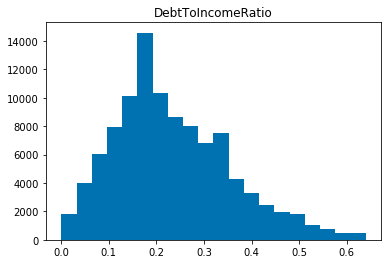



Variable:  EmploymentStatusDuration
Number of records:  103298
Missing records for this variable:  9768  -  91.36 % of full dataset
Min value: 0.0  // Max value:  366.0
Mean value:  89.14976088598037  // StdDv value:  81.78151445739361
Bin edges at:  [  0.   18.3  36.6  54.9  73.2  91.5 109.8 128.1 146.4 164.7 183.  201.3
 219.6 237.9 256.2 274.5 292.8 311.1 329.4 347.7 366. ]
366.0


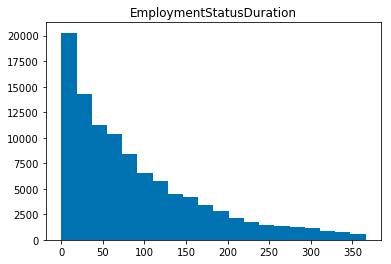



Variable:  AmountDelinquent
Number of records:  103335
Missing records for this variable:  9731  -  91.39 % of full dataset
Min value: 0.0  // Max value:  12336.0
Mean value:  282.56735859099047  // StdDv value:  1257.6747936592838
Bin edges at:  [    0.    616.8  1233.6  1850.4  2467.2  3084.   3700.8  4317.6  4934.4
  5551.2  6168.   6784.8  7401.6  8018.4  8635.2  9252.   9868.8 10485.6
 11102.4 11719.2 12336. ]
12336.0


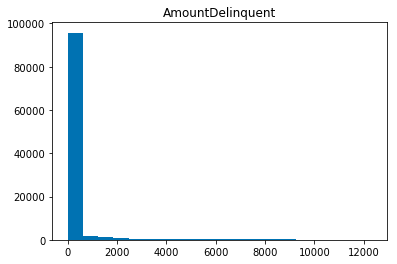



Variable:  StatedMonthlyIncome
Number of records:  110795
Missing records for this variable:  2271  -  97.99 % of full dataset
Min value: 0.0  // Max value:  16316.666667
Mean value:  5188.987499436825  // StdDv value:  2888.67008200627
Bin edges at:  [    0.           815.83333335  1631.6666667   2447.50000005
  3263.3333334   4079.16666675  4895.0000001   5710.83333345
  6526.6666668   7342.50000015  8158.3333335   8974.16666685
  9790.0000002  10605.83333355 11421.6666669  12237.50000025
 13053.3333336  13869.16666695 14685.0000003  15500.83333365
 16316.666667  ]
16316.666667


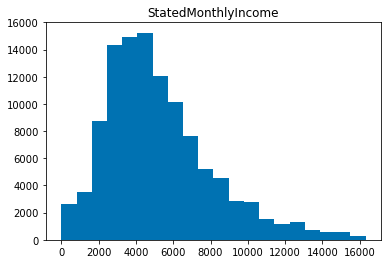



Variable:  OpenRevolvingMonthlyPayment
Number of records:  110802
Missing records for this variable:  2264  -  98.0 % of full dataset
Min value: 0.0  // Max value:  1704.0
Mean value:  358.27559971841663  // StdDv value:  333.65038637589277
Bin edges at:  [   0.    85.2  170.4  255.6  340.8  426.   511.2  596.4  681.6  766.8
  852.   937.2 1022.4 1107.6 1192.8 1278.  1363.2 1448.4 1533.6 1618.8
 1704. ]
1704.0


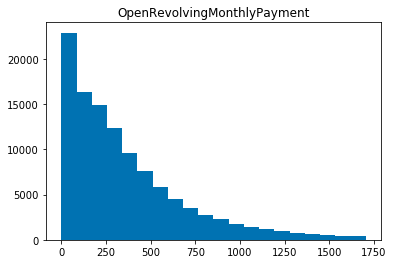

In [38]:
cols = ['DebtToIncomeRatio','EmploymentStatusDuration','AmountDelinquent','StatedMonthlyIncome','OpenRevolvingMonthlyPayment']

for col in cols:
    plot_dropoutlier_histogram(df_clean,col)

Under this kind of treatment, the 'DebtToIncomeRatio' and 'StatedMonthlyIncome' variables look far more normally distributed. 

### Bivariate Plot
Now I've gotten a sense for what types of loans Prosper offers, and to what sort of borrower, I'm curious about the interactions between variables - specifically, if there are any variables with strong and unexpected correlations.

To accomplish this visually, we can produce a correlation matrix of all the dataset's columns, and pass the matrix into a Red-Yellow-Green heatmap plot. This will highlight strong positive correlations (dark green), strong negative correlations (dark red), with weak correlations shaded yellow. All at once, we'll compare each variable to one another and plot the output in a way that allows for comparison across each pair!

In [39]:
# Define a new dataframe using the .corr() method
df_corr = df_clean.corr()

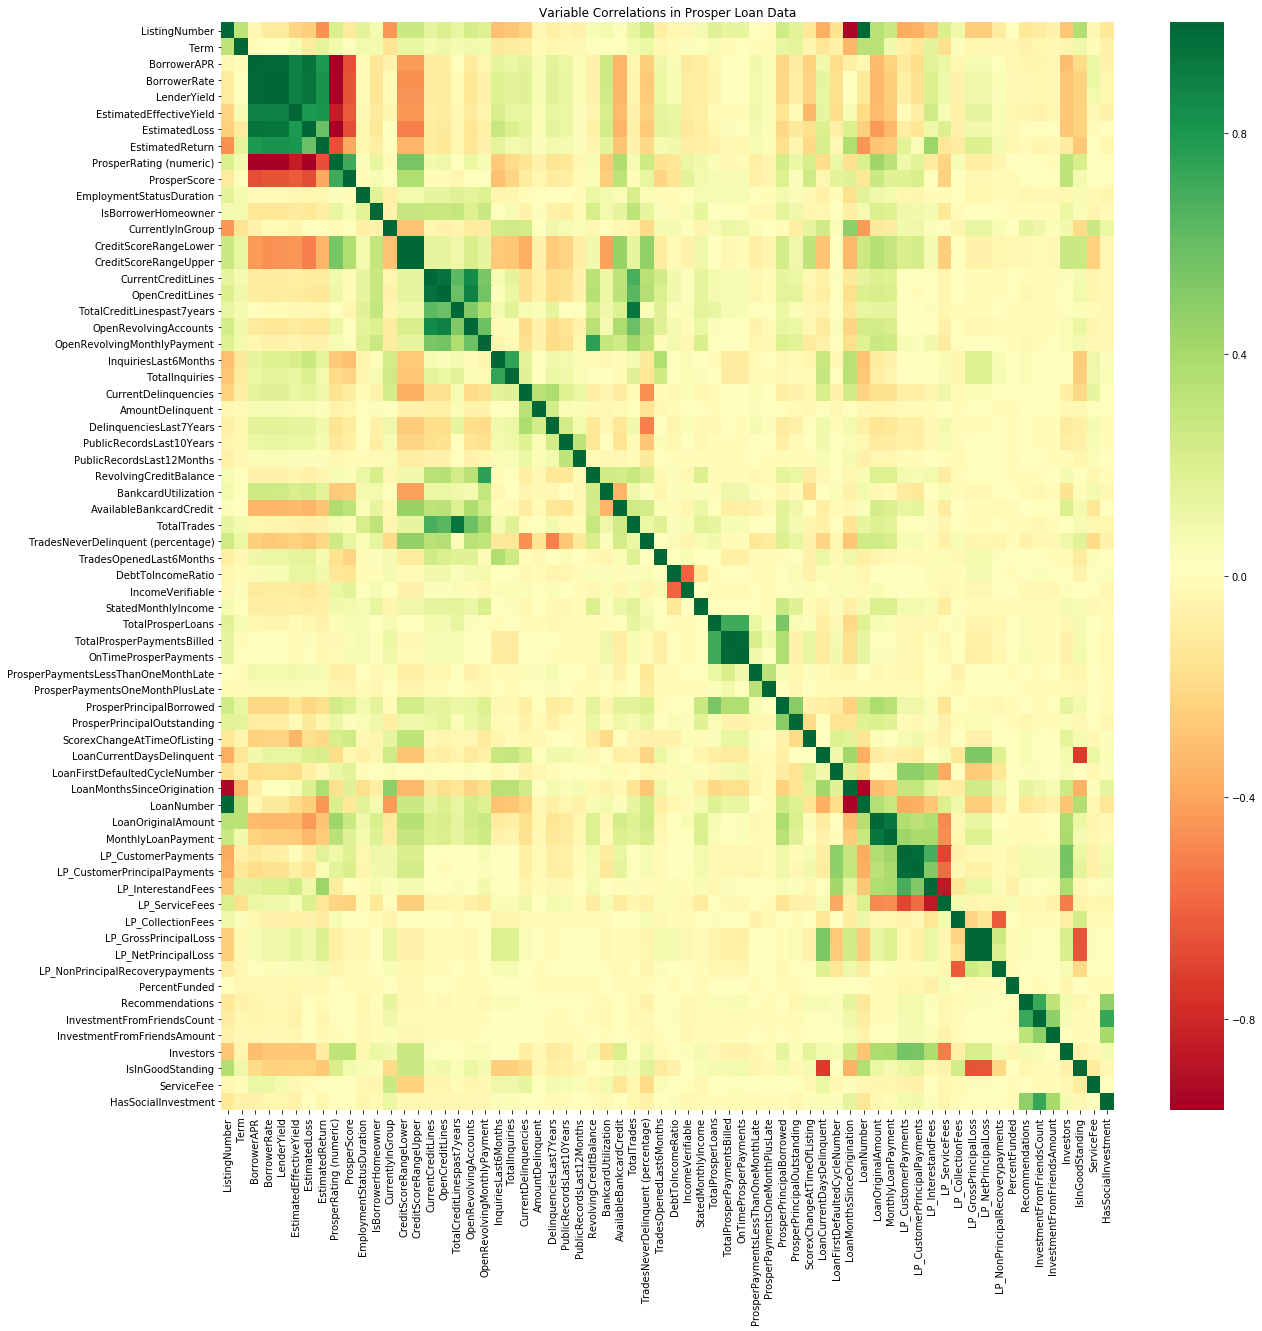

In [40]:
# We draw the figure with a single subplot, and enlarge the figure size 

fig, ax = plt.subplots(figsize=[20,20]);
sb.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,cmap=plt.cm.RdYlGn);
ax.set_title('Variable Correlations in Prosper Loan Data');

Though this plot can be challenging to read, it is highly informative. Excluding the middle diagonal (each column is perfectly correlated to itself), we can see that most of the variables have weak correlations with one another. There is clustering of some positive and negative correlations, similiar to repeated distribution shapes for alike variables in the univariate plots above. 

I'd be interested in plotting some of these relationships, but don't want to hunt around the above plot. I also don't want to plot too many, so I want a sorted list of correlated columns. First I need to check if there are any 'real' perfect 1.0 correlations. If the only 1.0 values are the diagonal mapping above, it's an easy hook to filter the data.

In [41]:
pd.options.display.max_rows = 400
corr_equal_one = (df_corr.unstack() ==1)
print(df_corr.unstack()[corr_equal_one])

ListingNumber                        ListingNumber                          1.0
Term                                 Term                                   1.0
BorrowerAPR                          BorrowerAPR                            1.0
BorrowerRate                         BorrowerRate                           1.0
LenderYield                          LenderYield                            1.0
EstimatedEffectiveYield              EstimatedEffectiveYield                1.0
EstimatedLoss                        EstimatedLoss                          1.0
EstimatedReturn                      EstimatedReturn                        1.0
ProsperRating (numeric)              ProsperRating (numeric)                1.0
ProsperScore                         ProsperScore                           1.0
EmploymentStatusDuration             EmploymentStatusDuration               1.0
IsBorrowerHomeowner                  IsBorrowerHomeowner                    1.0
CurrentlyInGroup                     Cur

After inspection, there are only two instances of different columns being perfectly correlated with one another: the 'CreditScoreRangeLower' and 'CreditScoreRangeUpper' columns. I am okay with dropping this correlation from further examination, as the two columns express different boundaries for the same fundamental information: the borrower's credit score. Since they're perfectly correlated, this suggests there's no meaningful difference in using either variable to represent a borrower's creditworthiness (as represented by the scoring methodology). 

Because there are no other perfect correlations, we can drop duplicates from the unstacked correlation matrix and sort to easily identify the strongest relationships.

In [42]:
corr_pairs = df_corr.unstack().sort_values().drop_duplicates()
print('Strong & Positive Correlations:')
corr_pairs[corr_pairs>.6].sort_values(ascending=False)

Strong & Positive Correlations:


ListingNumber                 ListingNumber                  1.000000
LenderYield                   BorrowerRate                   0.999207
ListingNumber                 LoanNumber                     0.995192
LP_GrossPrincipalLoss         LP_NetPrincipalLoss            0.992817
TotalProsperPaymentsBilled    OnTimeProsperPayments          0.990313
BorrowerRate                  BorrowerAPR                    0.989817
LenderYield                   BorrowerAPR                    0.989319
LP_CustomerPrincipalPayments  LP_CustomerPayments            0.977370
OpenCreditLines               CurrentCreditLines             0.960354
BorrowerAPR                   EstimatedLoss                  0.949343
EstimatedLoss                 LenderYield                    0.945059
                              BorrowerRate                   0.945047
TotalCreditLinespast7years    TotalTrades                    0.936537
LoanOriginalAmount            MonthlyLoanPayment             0.931856
EstimatedEffectiveYi

In [43]:
print ("Strong & Negative Correlations:")
corr_pairs[corr_pairs<-.6]

Strong & Negative Correlations:


EstimatedLoss                    ProsperRating (numeric)      -0.964150
BorrowerAPR                      ProsperRating (numeric)      -0.962202
ProsperRating (numeric)          LenderYield                  -0.953116
                                 BorrowerRate                 -0.953102
LoanNumber                       LoanMonthsSinceOrigination   -0.944303
LoanMonthsSinceOrigination       ListingNumber                -0.939083
LP_ServiceFees                   LP_InterestandFees           -0.862072
ProsperRating (numeric)          EstimatedEffectiveYield      -0.847622
IsInGoodStanding                 LoanCurrentDaysDelinquent    -0.730599
LP_ServiceFees                   LP_CustomerPayments          -0.702269
EstimatedLoss                    ProsperScore                 -0.675027
BorrowerAPR                      ProsperScore                 -0.669848
ProsperRating (numeric)          EstimatedReturn              -0.659428
IsInGoodStanding                 LP_GrossPrincipalLoss        -0

### Multivariate Plotting

Next, we'll choose some of these correlation pairs for plotting. For exploratory purposes, we'll choose both positively and negatively correlated variables, as well as some noncorrelated variables that sound interesting. As this exploration progresses, and based on the correlations observed above, I'm increasingly interested in how a Prosper loan performs in context of the borrower's overall credit usage, as well as the 'social' component of each loan. 

Here are some variables to plot:

Positive
    - BorrowerAPR / LenderYield / BorrowerRate  and EstimatedLoss
    - TotalTrades and TotalCreditLinespast7years
    - EstimatedReturn and BorrowerRate
    
Uncorrelated 
    - BorrowerAPR and LoanOriginalAmount
    - AmountDelinquent and LoanOriginalAmount
    - BorrowerAPR and AmountDelinquent
    - AmountDelinquent and InvestmentFromFriendsAmount

Negative
    - ProsperRating (numeric) and EstimatedLoss
    - LP_CollectionFees and LP_NonPrincipalRecoverypayments
    - IncomeVerifiable and DebtToIncomeRatio
    - BorrowerAPR and RevolvingCreditBalance
 
Once again, let's try to do this programmatically, since manually plotting these (11) pairs would be a pain. However, we can create dictionaries for each, and use loops once again to plot each. We'll pass the "HasSocialInvestment" boolean into the plot's hue to escalate each bivariate plot to a multivariate plot, allowing us to see how the subset of loans funded by friends compare to a 'normal' Prosper loan across both variables.

In [44]:
pos_corrs = {'BorrowerAPR':'EstimatedLoss','TotalTrades':'TotalCreditLinespast7years','BorrowerRate':'EstimatedReturn'}
neg_corrs = {'ProsperRating (numeric)':'EstimatedLoss','LP_CustomerPayments':'LP_ServiceFees','LP_CollectionFees':'LP_NonPrincipalRecoverypayments','IncomeVerifiable':'DebtToIncomeRatio'}
un_corrs = {'BorrowerAPR':'LoanOriginalAmount','LoanOriginalAmount':'AmountDelinquent','BorrowerAPR':'AmountDelinquent','InvestmentFromFriendsAmount':'AmountDelinquent'}

#### Positively Correlated Plots

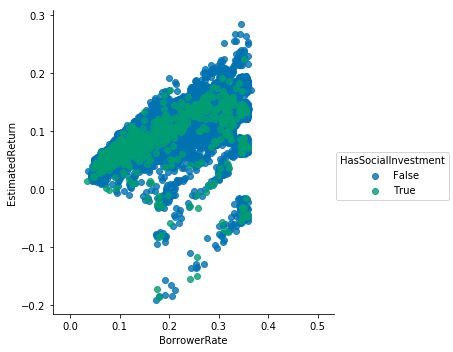

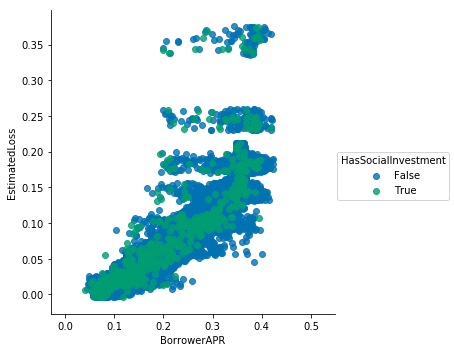

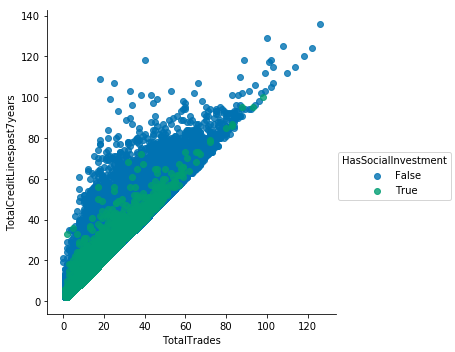

In [45]:
for key,value in pos_corrs.items():
    try:
        jitter = 0.01
        sb.lmplot(x=key,y=value,data=df_clean,fit_reg=False,hue='HasSocialInvestment',legend=True,x_jitter=jitter,y_jitter=jitter)
        #plt.scatter(df_clean[key],df_clean[value])
        plt.show()
    except:
        print("Error on: ",key,value)

##### Observations

BorrowerAPR and EstimatedLoss
 - There appears to be some convexity here, as the EstimatedLosses increase faster than APR on higher interest loans
 - Loans with social investment seem to have a tighter spread than the general population, and appear to cluster around both lower APRs and Estimated Losses compared to the overall population
 
TotalTrades and TotalCreditLinespast7years
 - There's a clear horizon here, due to definitional reasons. By default, each 'trade' should map to at least one credit line
 - Once again, the loans with social investment have a tighter spread than those without - it appears those borrowers tend to have fewer credit lines per 'trade' account than borrowers without social funding
 
 EstimatedReturn and BorrowerRate
 - There are some interesting distributions here, with multiple linear striations (I hypothesize that there's some sort of time dependency here, with clusters of loans performing similarly based on similar terms and origination dates)
 - There appears to be a cutoff at ~.17, with loans below estimating only minor losses if any
 - Once again, loans with social investments appear to have a tighter spread, and appear to skew towards both lower APRs and estimated losses/returns
 
 #### Uncorrelated Plots

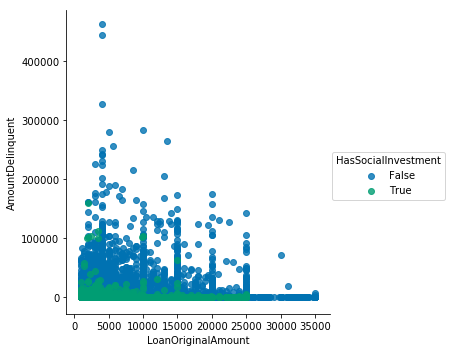

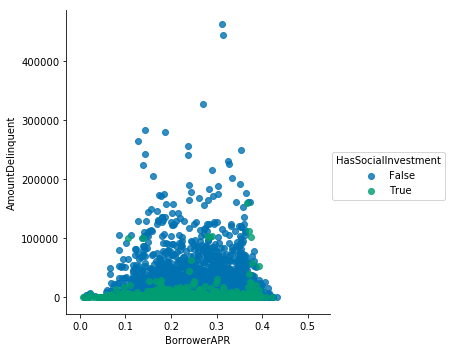

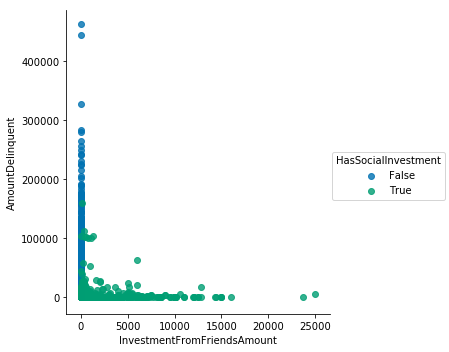

In [46]:
for key,value in un_corrs.items():
    try:
        jitter = 0.01
        sb.lmplot(x=key,y=value,data=df_clean,fit_reg=False,hue='HasSocialInvestment',legend=True,x_jitter=jitter,y_jitter=jitter)
        #plt.scatter(df_clean[key],df_clean[value])
        plt.show()
    except:
        print("Error on: ",key,value)

##### Observations

BorrowerAPR and AmountDelinquent
 - Borrowers with social funding appear to be substantially less deliquent on their other credit utilization compared to other borrowers
 
LoanOriginalAmount and AmountDelinquent
 - Again, socially-funded borrowers appear to have a tighter spread, trending toward both smaller loans and less deliquencies compared to other borrowers
 
InvestmentFromFriendsAmount and AmoundDelinquent
 - Once more, socially-funded loans tend to have less delinquent debt
 - It appears that, among loans with social funding, those borrowers with less / without delinquent debt recieve more social funding
 
 #### Negatively Correlated Plots

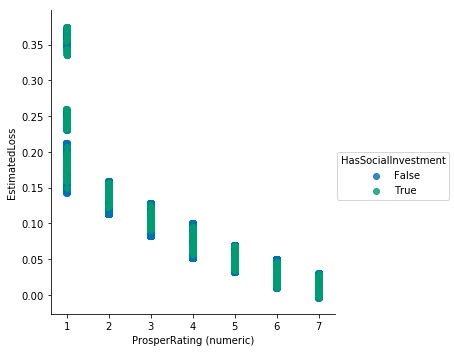

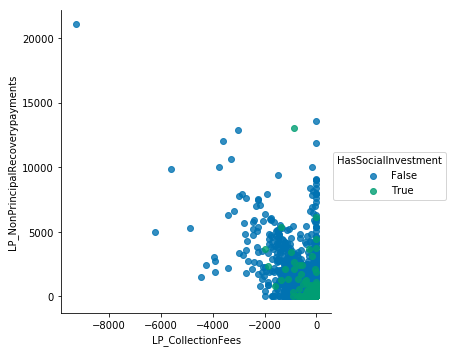

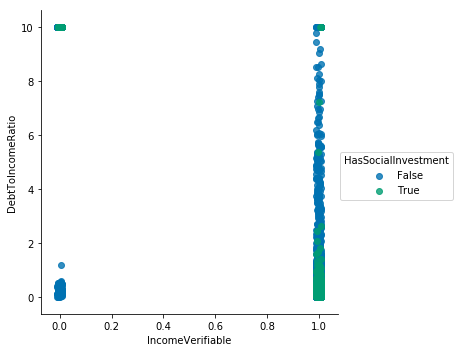

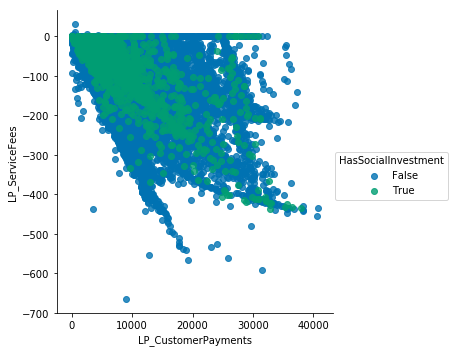

In [47]:
for key,value in neg_corrs.items():
    try:
        jitter = 0.01
        sb.lmplot(x=key,y=value,data=df_clean,fit_reg=False,hue='HasSocialInvestment',legend=True,x_jitter=jitter,y_jitter=jitter)
        #plt.scatter(df_clean[key],df_clean[value])
        plt.show()
    except:
        print("Error on: ",key,value)

##### Observations

LP_CollectionFees and LP_NonPrincipalPaymentRecoveryPayments
 - In keeping with the observations above, socially-funded loans appear to have a tighter spread
 - Socially-funded loans tend to incurr fewer collection fees and fewer recovery payments

ProsperRating (numeric) and EstimatedLoss
 - As expected, the higher the prosper score, the lower the estimated loss
 - The socially-funded loans have a slightly tighter spread than other loans, but the difference appears negligible
 

LP_CustomerPayments and LP_ServiceFees
 - Socially-funded loans have a tighter spread than others, and are centered toward fewer service fees and payments (in keeping with above observations that the loans are for smaller amounts)
 
IncomeVerifiable and DebtToIncomeRatio
 - Among verifiable income, the socially funded loans tend to have much lower debt to income than other loans
 - Among unverifiable income, the socially funded loans have among the highest debt to income
 - This is confusing and surprising


#### Timeseries
Now that we've explored quite a few variables and have a better grasp of how the socially funded loans perform, I'm curious to get a sense of timing. Our dataset covers ~9 years - which is not that long in terms of credit cycles, but relationships change over time and I know that, generally, loan performance was not static and consistent from 2005 through 2014. 

So let's put together some stacked bar charts to see how Prosper's loans have performed over the timespan of the dataset, as well as how popular the social investment feature has been. This will require re-grouping and pivoting the dataframe to create the stacked bars.

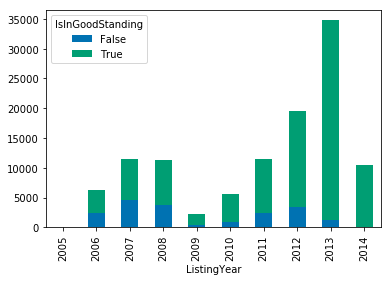

In [48]:
df_clean['ListingYear'] = df_clean['ListingCreationDate'].dt.strftime('%Y')
df_plot_standing = df_plot = df_clean.groupby(['IsInGoodStanding','ListingYear']).size().reset_index().pivot(columns='IsInGoodStanding',index='ListingYear',values=0)
df_plot_standing.plot(kind='bar',stacked=True)
plt.show()

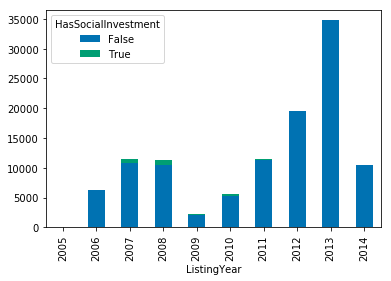

In [49]:
df_clean['ListingYear'] = df_clean['ListingCreationDate'].dt.strftime('%Y')
df_plot_socialfunded = df_plot = df_clean.groupby(['HasSocialInvestment','ListingYear']).size().reset_index().pivot(columns='HasSocialInvestment',index='ListingYear',values=0)
df_plot_socialfunded.plot(kind='bar',stacked=True)
plt.show()

Unsurprisingly, there's a higher proportion of non-performing loans listed in the lead-up to the finincial crisis. However, it is surprising to see that these were also the highest years for loans with social funding. While some loans listed in 2010 and 2011 were socially funded, they've virtually disappeared in the more-recent listings. This may heighten our findings above, as the socially-funded loans not only performed better than non-social loans - but did so under a worse credit environment than the majority of the loans in our dataset.

### Explanatory Plots

For my presentation, I want to focus on the performance of the socially-funded loans. 

# Socially-Funded Loans on Prosper
## by Tom Schonig

## Dataset Overview
The dataset in consideration was curated by Udacity, but originated from Prosper.com. The dataset contains information about loans listed on Prosper from November 2005 through March 2014. The original dataset contained 113,937 across 81 variables - however, my wrangling uncovered 871 duplicate listings that were removed prior to analysis (for a "cleaned" total of 113,066 records).

## Investigation Overview
I began this investigation with some background knowledge of finance and banking, but no hand-on experience with Peer-to-Peer lending platforms - so I had many open-ended questions. Initially, I wanted to get a sense of the overall Prosper book of business - who were they lending to, and under what terms? How did the loans compare to traditional lenders? Etc...

Rather than fixate on a few variables that, based on intuition (or some lesser compulsion) looked interesting, I resolved to find a way to programmatically plot and evaluate all the variables in the dataset. I wanted to deeply understand it, and knew that my questions would be refined as I better contextualized the data.

As I began plotting each variable and the correlations between them, it dawned on me the unique differentiator of Peer-to-Peer lending: ideally, it actually facilitates lending between people who know eachother. I kept remembering J.P. Morgan's biography and his legendary comments to Congress..

Samuel Untermeyer: "Is not commercial credit based primarily upon money or property?"


J.P. Morgan: "No, sir; the first thing is character."


Samuel Untermeyer: "Before money or property?"


J.P. Morgan: "Before money or anything else. Money cannot buy it.”


While I've informally loaned people money before, I've never really thought about those types of transactions in-macro, and how my first-hand knowledge of the borrower may impact repayment and other loan attributes. The Prosper data gave a window into how some of these types of transactions perform when formalized and standardized as a legally-binding loan. Accordingly, I locked onto this as the main thread for deeper investigation.

## Prosper's Book of Business
Prosper is a Peer-to-Peer lending service that facilitates an open marketplace for personal loans, which has grown rapidly in the recovery after the Financial Crisis. Over the years, the platform has made enhancements aimed to make it safer for most investors - and delinquency rates have fallen in response. 

However, changes to the platform also include removing certain social features, like the ability for borrowers to solict funding from their friends. These features were never widely used, with only a small number of loans listed between 2007 and 2011 utilizing the feature.

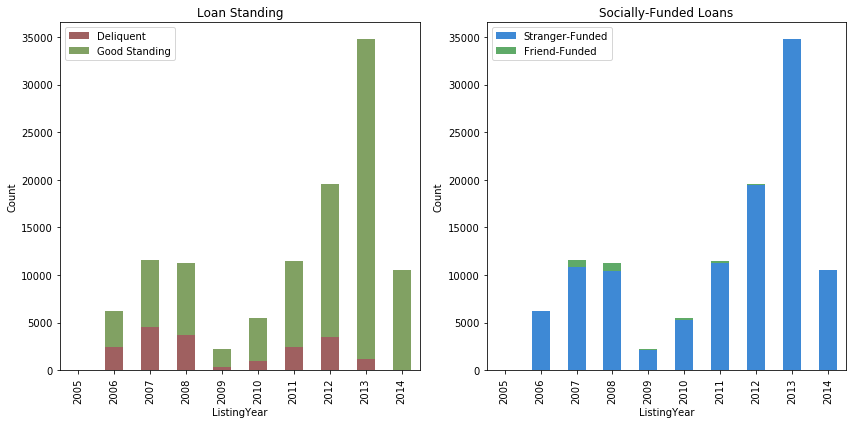

In [50]:
fig = plt.figure(figsize=[12,6])
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_title('Loan Standing')
ax2.set_title('Socially-Funded Loans')

ax1.set_ylabel('Count')
ax2.set_ylabel('Count')


df_plot_standing.plot(kind='bar',stacked=True,ax=ax1,color=['#9f6060','#81a163'])
df_plot_socialfunded.plot(kind='bar',stacked=True,ax=ax2, color=['#3e89d5','#5faa68'])
ax1.legend(labels=['Deliquent','Good Standing'])
ax2.legend(labels=['Stranger-Funded','Friend-Funded'])
plt.tight_layout()
plt.show()

## How Do Social Borrowers Differ?
Using the Internet Archive, we can visit Prosper's old websites and see that they used to market socially-funded loans as less risky. And there appears to be evidence to support that.

The borrowers soliciting funding from their friends on Prosper appear to be more responsible users of credit - they had both fewer total dollars deliquent across their credit lines, and were using Prosper to take out smaller loans, compared other borrowers. Even more, there was much less variability among these borrowers compared to borrowers on Prosper asking strangers for money.


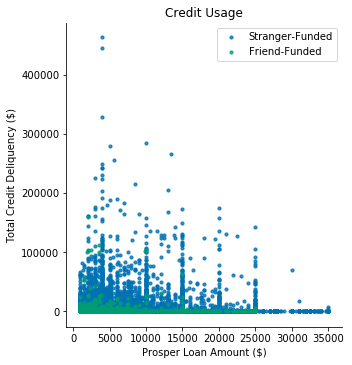

In [51]:
jitter = .01
sb.lmplot(x='LoanOriginalAmount',y='AmountDelinquent',data=df_clean,fit_reg=False,hue='HasSocialInvestment',legend=False,x_jitter=jitter,y_jitter=jitter,scatter_kws={"s": 10})
plt.legend(labels=['Stranger-Funded','Friend-Funded'])
plt.ylabel("Total Credit Deliquency ($)")
plt.xlabel("Prosper Loan Amount ($)")
plt.title("Credit Usage")
plt.show()

## How Do Friend-Funded Loans Perform?
While friend-funded loans are not immune to losses, they do appear to perform better (and offer a better investment) than loans fully-funded by strangers. Most of these loans are centered around lower interest rates and losses. And even at higher interest rates (riskier loans), the losses on friend-funded loans are lower and more-tightly clustered than loans fully-funded by strangers.

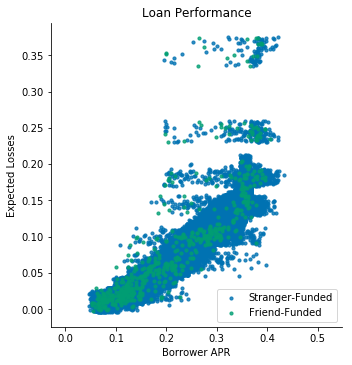

In [52]:
jitter = .01
sb.lmplot(x='BorrowerAPR',y='EstimatedLoss',data=df_clean,fit_reg=False,hue='HasSocialInvestment',legend=False,x_jitter=jitter,y_jitter=jitter,scatter_kws={"s": 10})
plt.legend(labels=['Stranger-Funded','Friend-Funded'])
plt.ylabel("Expected Losses")
plt.xlabel("Borrower APR")
plt.title("Loan Performance")
plt.show()